使用设备: cuda
发现2个GPU
正在下载和准备数据集...
训练数据集大小: 2944
解冻编码器层: 10
解冻编码器层: 11
使用2个GPU进行训练
开始训练模型...


Epoch 1/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.94it/s, loss=0.91, acc=91.3] 


Epoch 1/10 - Train Loss: 2.2742, Train Acc: 56.25% - Val Loss: 0.8856, Val Acc: 91.30%
保存最佳模型 (验证准确率: 91.30%)


Epoch 2/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.87it/s, loss=0.389, acc=94.2]


Epoch 2/10 - Train Loss: 0.4686, Train Acc: 93.95% - Val Loss: 0.3066, Val Acc: 94.16%
保存最佳模型 (验证准确率: 94.16%)


Epoch 3/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.86it/s, loss=0.336, acc=94.7]


Epoch 3/10 - Train Loss: 0.1963, Train Acc: 96.74% - Val Loss: 0.2268, Val Acc: 94.70%
保存最佳模型 (验证准确率: 94.70%)


Epoch 4/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.88it/s, loss=0.32, acc=93.9] 


Epoch 4/10 - Train Loss: 0.1221, Train Acc: 97.96% - Val Loss: 0.2098, Val Acc: 93.89%


Epoch 5/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.88it/s, loss=0.307, acc=95.1]


Epoch 5/10 - Train Loss: 0.0841, Train Acc: 98.95% - Val Loss: 0.1833, Val Acc: 95.11%
保存最佳模型 (验证准确率: 95.11%)


Epoch 6/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.82it/s, loss=0.272, acc=94.7]


Epoch 6/10 - Train Loss: 0.0567, Train Acc: 99.52% - Val Loss: 0.1691, Val Acc: 94.70%


Epoch 7/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.85it/s, loss=0.327, acc=95]  


Epoch 7/10 - Train Loss: 0.0423, Train Acc: 99.59% - Val Loss: 0.1720, Val Acc: 94.97%


Epoch 8/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.92it/s, loss=0.243, acc=95.5]


Epoch 8/10 - Train Loss: 0.0307, Train Acc: 99.80% - Val Loss: 0.1626, Val Acc: 95.52%
保存最佳模型 (验证准确率: 95.52%)


Epoch 9/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.92it/s, loss=0.211, acc=95.1] 


Epoch 9/10 - Train Loss: 0.0245, Train Acc: 99.93% - Val Loss: 0.1623, Val Acc: 95.11%


Epoch 10/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.88it/s, loss=0.235, acc=95.4] 


Epoch 10/10 - Train Loss: 0.0213, Train Acc: 99.83% - Val Loss: 0.1472, Val Acc: 95.38%
解冻编码器层: 10
解冻编码器层: 11


/tmp/ipykernel_3931309/3956798144.py:244: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vit_model_OxfordPets.pth'))


在测试集上评估模型...


评估模型: 100%|██████████| 29/29 [00:09<00:00,  3.02it/s]



分类报告:
                            precision    recall  f1-score   support

                Abyssinian       0.92      0.87      0.89        98
          American Bulldog       0.76      0.90      0.83       100
 American Pit Bull Terrier       0.85      0.67      0.75       100
              Basset Hound       0.99      0.94      0.96       100
                    Beagle       0.94      0.97      0.96       100
                    Bengal       0.75      0.95      0.84       100
                    Birman       0.83      0.79      0.81       100
                    Bombay       0.80      0.98      0.88        88
                     Boxer       0.93      0.94      0.93        99
         British Shorthair       0.98      0.79      0.87       100
                 Chihuahua       0.99      0.92      0.95       100
              Egyptian Mau       0.94      0.81      0.87        97
    English Cocker Spaniel       0.98      0.98      0.98       100
            English Setter       0.99   

/tmp/ipykernel_3931309/3956798144.py:298: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


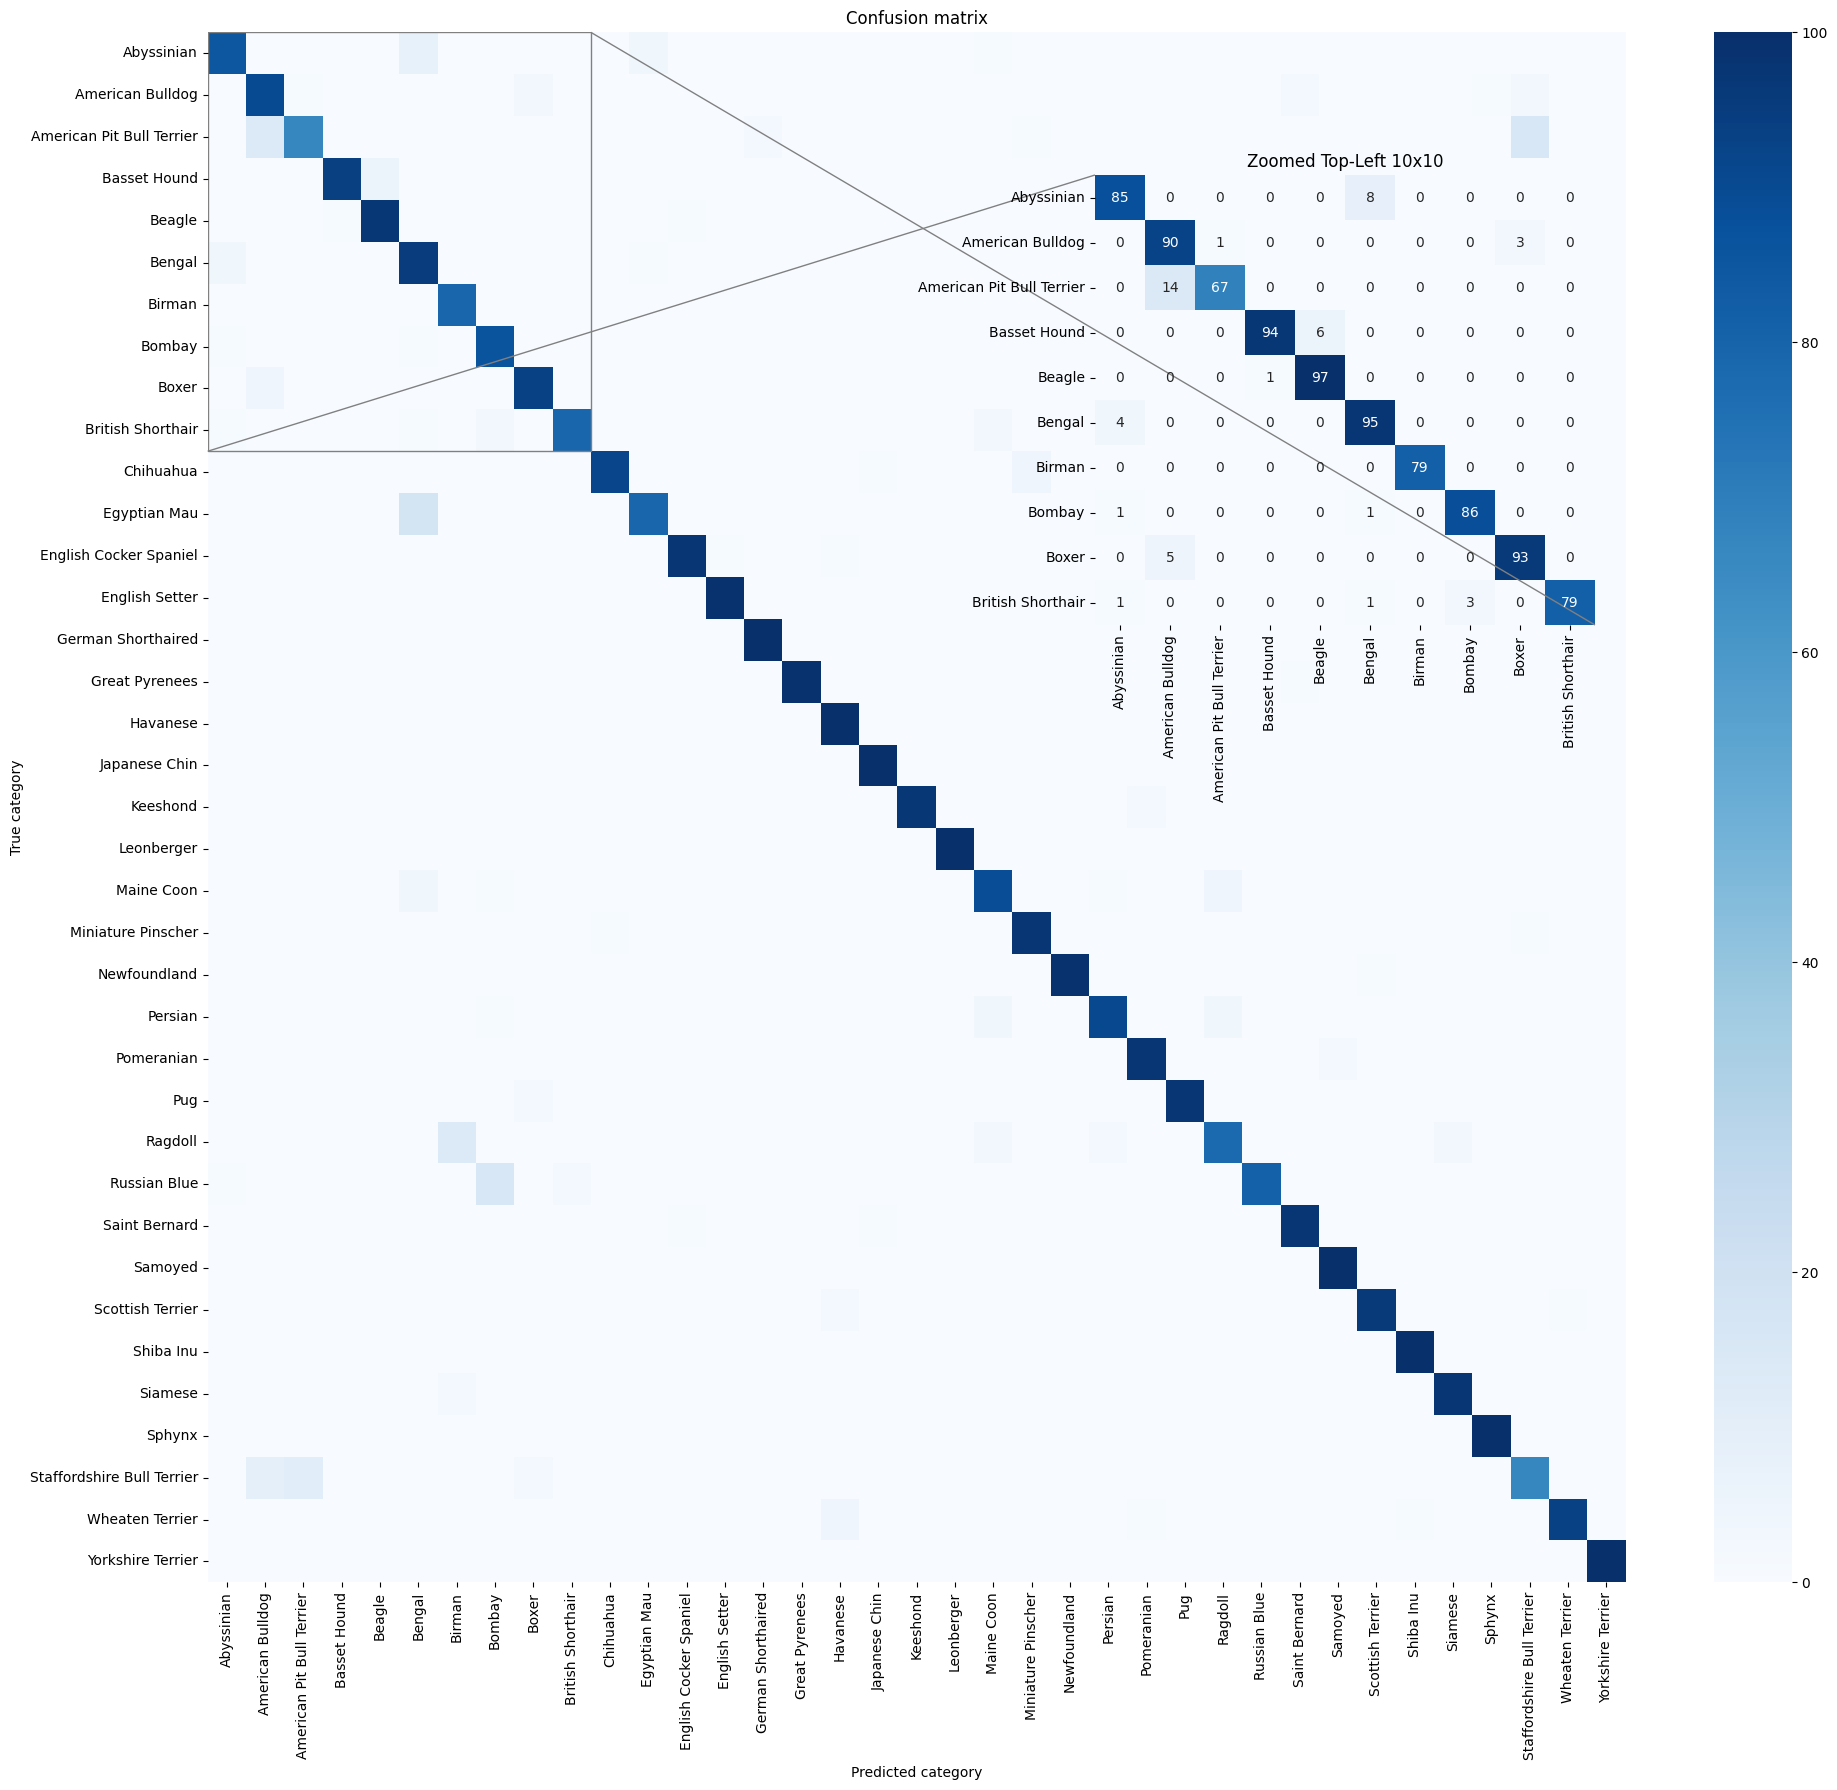

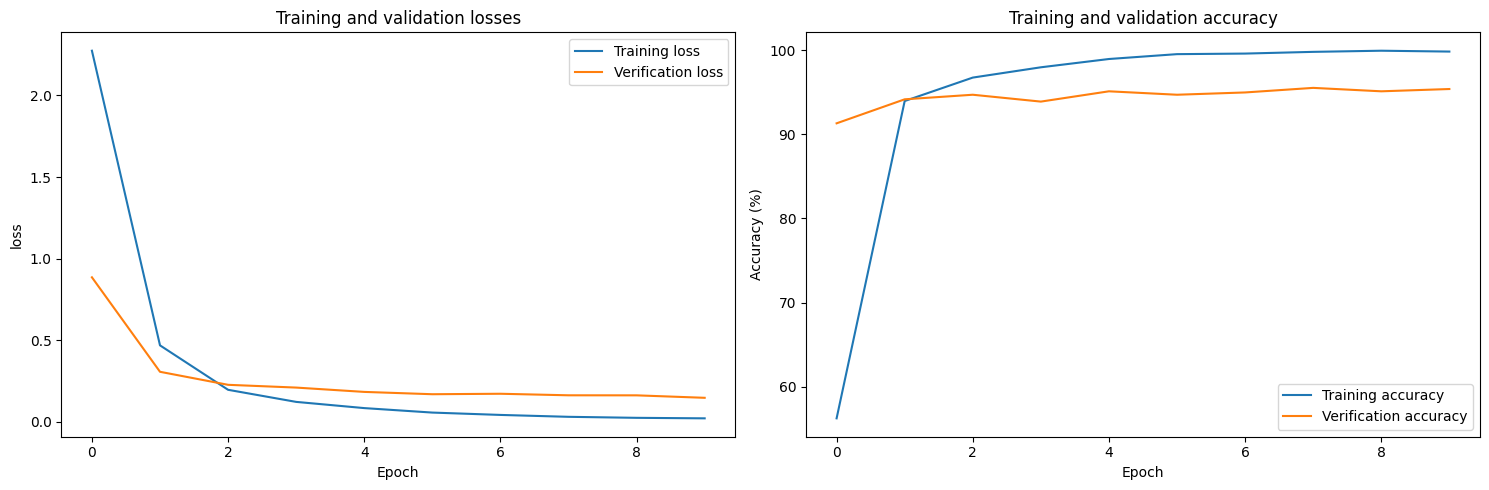

模型训练和评估完成!
混淆矩阵和训练历史已保存为图片文件.


In [1]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用预训练模型的默认转换
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 获取OxfordPets数据集
print("正在下载和准备数据集...")
dataset = datasets.OxfordIIITPet(
    root='./data',
    split='trainval',
    download=True,
    transform=train_transform
)

# 划分训练集和验证集
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")

# 创建测试集
test_dataset = datasets.OxfordIIITPet(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 创建数据加载器
batch_size = 128

# 单GPU和多GPU都使用相同的数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 构建预训练ViT模型
def create_vit_model(num_classes=37, unfrozen_layers=2):
    """
    构建ViT模型，并解冻分类头和编码器的最后几层。

    参数:
    - num_classes (int): 数据集的类别数量。
    - unfrozen_layers (int): 要从编码器末尾解冻的Transformer Block数量。
    """
    # 使用推荐的权重API加载预训练的ViT模型
    weights = ViT_B_16_Weights.IMAGENET1K_V1
    model = vit_b_16(weights=weights)
    
    # 首先，冻结所有预训练层的参数
    for param in model.parameters():
        param.requires_grad = False
    
    # ------------------- 主要修改部分开始 -------------------
    
    # ViT-B/16 的编码器有12个Transformer Block，存储在 model.encoder.layers 中
    # 我们将解冻最后的 `unfrozen_layers` 个Block
    if unfrozen_layers > 0:
        total_layers = len(model.encoder.layers)
        for i in range(total_layers - unfrozen_layers, total_layers):
            print(f"解冻编码器层: {i}")
            for param in model.encoder.layers[i].parameters():
                param.requires_grad = True

    # ------------------- 主要修改部分结束 -------------------
    
    # 修改分类头以适应新的任务（37个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 解冻新分类头的参数（默认就是True，但为清晰起见再次设置）
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# --- 在实例化模型时调用修改后的函数 ---
# 我们可以选择解冻最后2层
model = create_vit_model(num_classes=37, unfrozen_layers=2)

# 使用DataParallel在多个GPU上并行运行
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器
# 只优化需要训练的参数（即分类头的参数）
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    [p for p in model.parameters() if p.requires_grad], 
    lr=1e-4
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 训练函数
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 对于DataParallel模型，需要保存model.module
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'best_vit_model_OxfordPets.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 训练模型
print("开始训练模型...")
epochs = 10  # 预训练模型通常需要更少的训练轮数
history = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 评估模型
def evaluate_model(model, data_loader, device):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 加载最佳模型进行评估
model = create_vit_model()
model.load_state_dict(torch.load('best_vit_model_OxfordPets.pth'))
model = model.to(device)

# 如果有多个GPU，在评估时也使用DataParallel
if device_count > 1:
    model = nn.DataParallel(model)

model.eval()

# 在测试集上评估
print("在测试集上评估模型...")
true_labels, predictions = evaluate_model(model, test_loader, device)

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=dataset.classes))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=dataset.classes, yticklabels=dataset.classes)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
ax.set_title('Confusion matrix')

# --- 新增代码：创建并绘制放大的子图 ---

# 定义要放大的区域（例如左上角10x10的区域）
zoom_size = 10
x1, x2 = 0, zoom_size
y1, y2 = 0, zoom_size

# 创建一个子坐标轴 (inset_axes)
ax_zoom = fig.add_axes([0.55, 0.65, 0.25, 0.25]) # [left, bottom, width, height]

# 提取要放大的数据
cm_zoom = cm[y1:y2, x1:x2]
class_names_zoom = dataset.classes[y1:y2]

# 在子坐标轴上绘制热力图
sns.heatmap(cm_zoom, annot=True, fmt='d', cmap='Blues', ax=ax_zoom, cbar=False,
            xticklabels=class_names_zoom, yticklabels=class_names_zoom)
ax_zoom.set_title(f'Zoomed Top-Left {zoom_size}x{zoom_size}')
ax_zoom.tick_params(axis='x', labelrotation=90)
ax_zoom.tick_params(axis='y', labelrotation=0)

# 可选：添加标记线指示放大区域
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('confusion_matrix_OxfordPets.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_OxfordPets.png')
plt.show()
plt.close()

print("模型训练和评估完成!")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在下载和准备数据集...
训练数据集大小: 1020
解冻编码器层: 10
解冻编码器层: 11
使用2个GPU进行训练
开始训练模型...


Epoch 1/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s, loss=1.99, acc=65.3]


Epoch 1/10 - Train Loss: 3.5116, Train Acc: 26.47% - Val Loss: 1.8427, Val Acc: 65.29%
保存最佳模型 (验证准确率: 65.29%)


Epoch 2/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s, loss=0.888, acc=88.2]


Epoch 2/10 - Train Loss: 0.8831, Train Acc: 88.04% - Val Loss: 0.7442, Val Acc: 88.24%
保存最佳模型 (验证准确率: 88.24%)


Epoch 3/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.20it/s, loss=0.453, acc=91.6]


Epoch 3/10 - Train Loss: 0.1875, Train Acc: 98.73% - Val Loss: 0.4339, Val Acc: 91.57%
保存最佳模型 (验证准确率: 91.57%)


Epoch 4/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s, loss=0.309, acc=92.5] 


Epoch 4/10 - Train Loss: 0.0469, Train Acc: 99.90% - Val Loss: 0.3650, Val Acc: 92.45%
保存最佳模型 (验证准确率: 92.45%)


Epoch 5/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s, loss=0.428, acc=92.2] 


Epoch 5/10 - Train Loss: 0.0245, Train Acc: 99.80% - Val Loss: 0.3429, Val Acc: 92.16%


Epoch 6/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s, loss=0.273, acc=93.3] 


Epoch 6/10 - Train Loss: 0.0120, Train Acc: 100.00% - Val Loss: 0.3106, Val Acc: 93.33%
保存最佳模型 (验证准确率: 93.33%)


Epoch 7/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s, loss=0.36, acc=92.7]  


Epoch 7/10 - Train Loss: 0.0071, Train Acc: 100.00% - Val Loss: 0.2930, Val Acc: 92.75%


Epoch 8/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s, loss=0.304, acc=93.3] 


Epoch 8/10 - Train Loss: 0.0054, Train Acc: 100.00% - Val Loss: 0.2791, Val Acc: 93.33%


Epoch 9/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s, loss=0.285, acc=93.8] 


Epoch 9/10 - Train Loss: 0.0042, Train Acc: 100.00% - Val Loss: 0.2732, Val Acc: 93.82%
保存最佳模型 (验证准确率: 93.82%)


Epoch 10/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s, loss=0.295, acc=93.8]


Epoch 10/10 - Train Loss: 0.0037, Train Acc: 100.00% - Val Loss: 0.2702, Val Acc: 93.82%
解冻编码器层: 10
解冻编码器层: 11


/tmp/ipykernel_3931309/1010072023.py:255: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vit_model_Flowers102.pth'))


在测试集上评估模型...


评估模型: 100%|██████████| 97/97 [00:16<00:00,  5.88it/s]



分类报告:
              precision    recall  f1-score   support

     Class 1       0.70      0.95      0.81        20
     Class 2       1.00      0.97      0.99        40
     Class 3       0.43      0.75      0.55        20
     Class 4       0.66      0.58      0.62        36
     Class 5       0.96      0.96      0.96        45
     Class 6       1.00      0.92      0.96        25
     Class 7       0.71      1.00      0.83        20
     Class 8       0.96      1.00      0.98        65
     Class 9       0.76      0.96      0.85        26
    Class 10       1.00      1.00      1.00        25
    Class 11       0.92      0.85      0.88        67
    Class 12       0.97      0.94      0.95        67
    Class 13       0.97      1.00      0.98        29
    Class 14       0.93      1.00      0.97        28
    Class 15       0.71      0.93      0.81        29
    Class 16       0.66      0.90      0.76        21
    Class 17       1.00      0.94      0.97        65
    Class 18       0

/tmp/ipykernel_3931309/1010072023.py:321: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


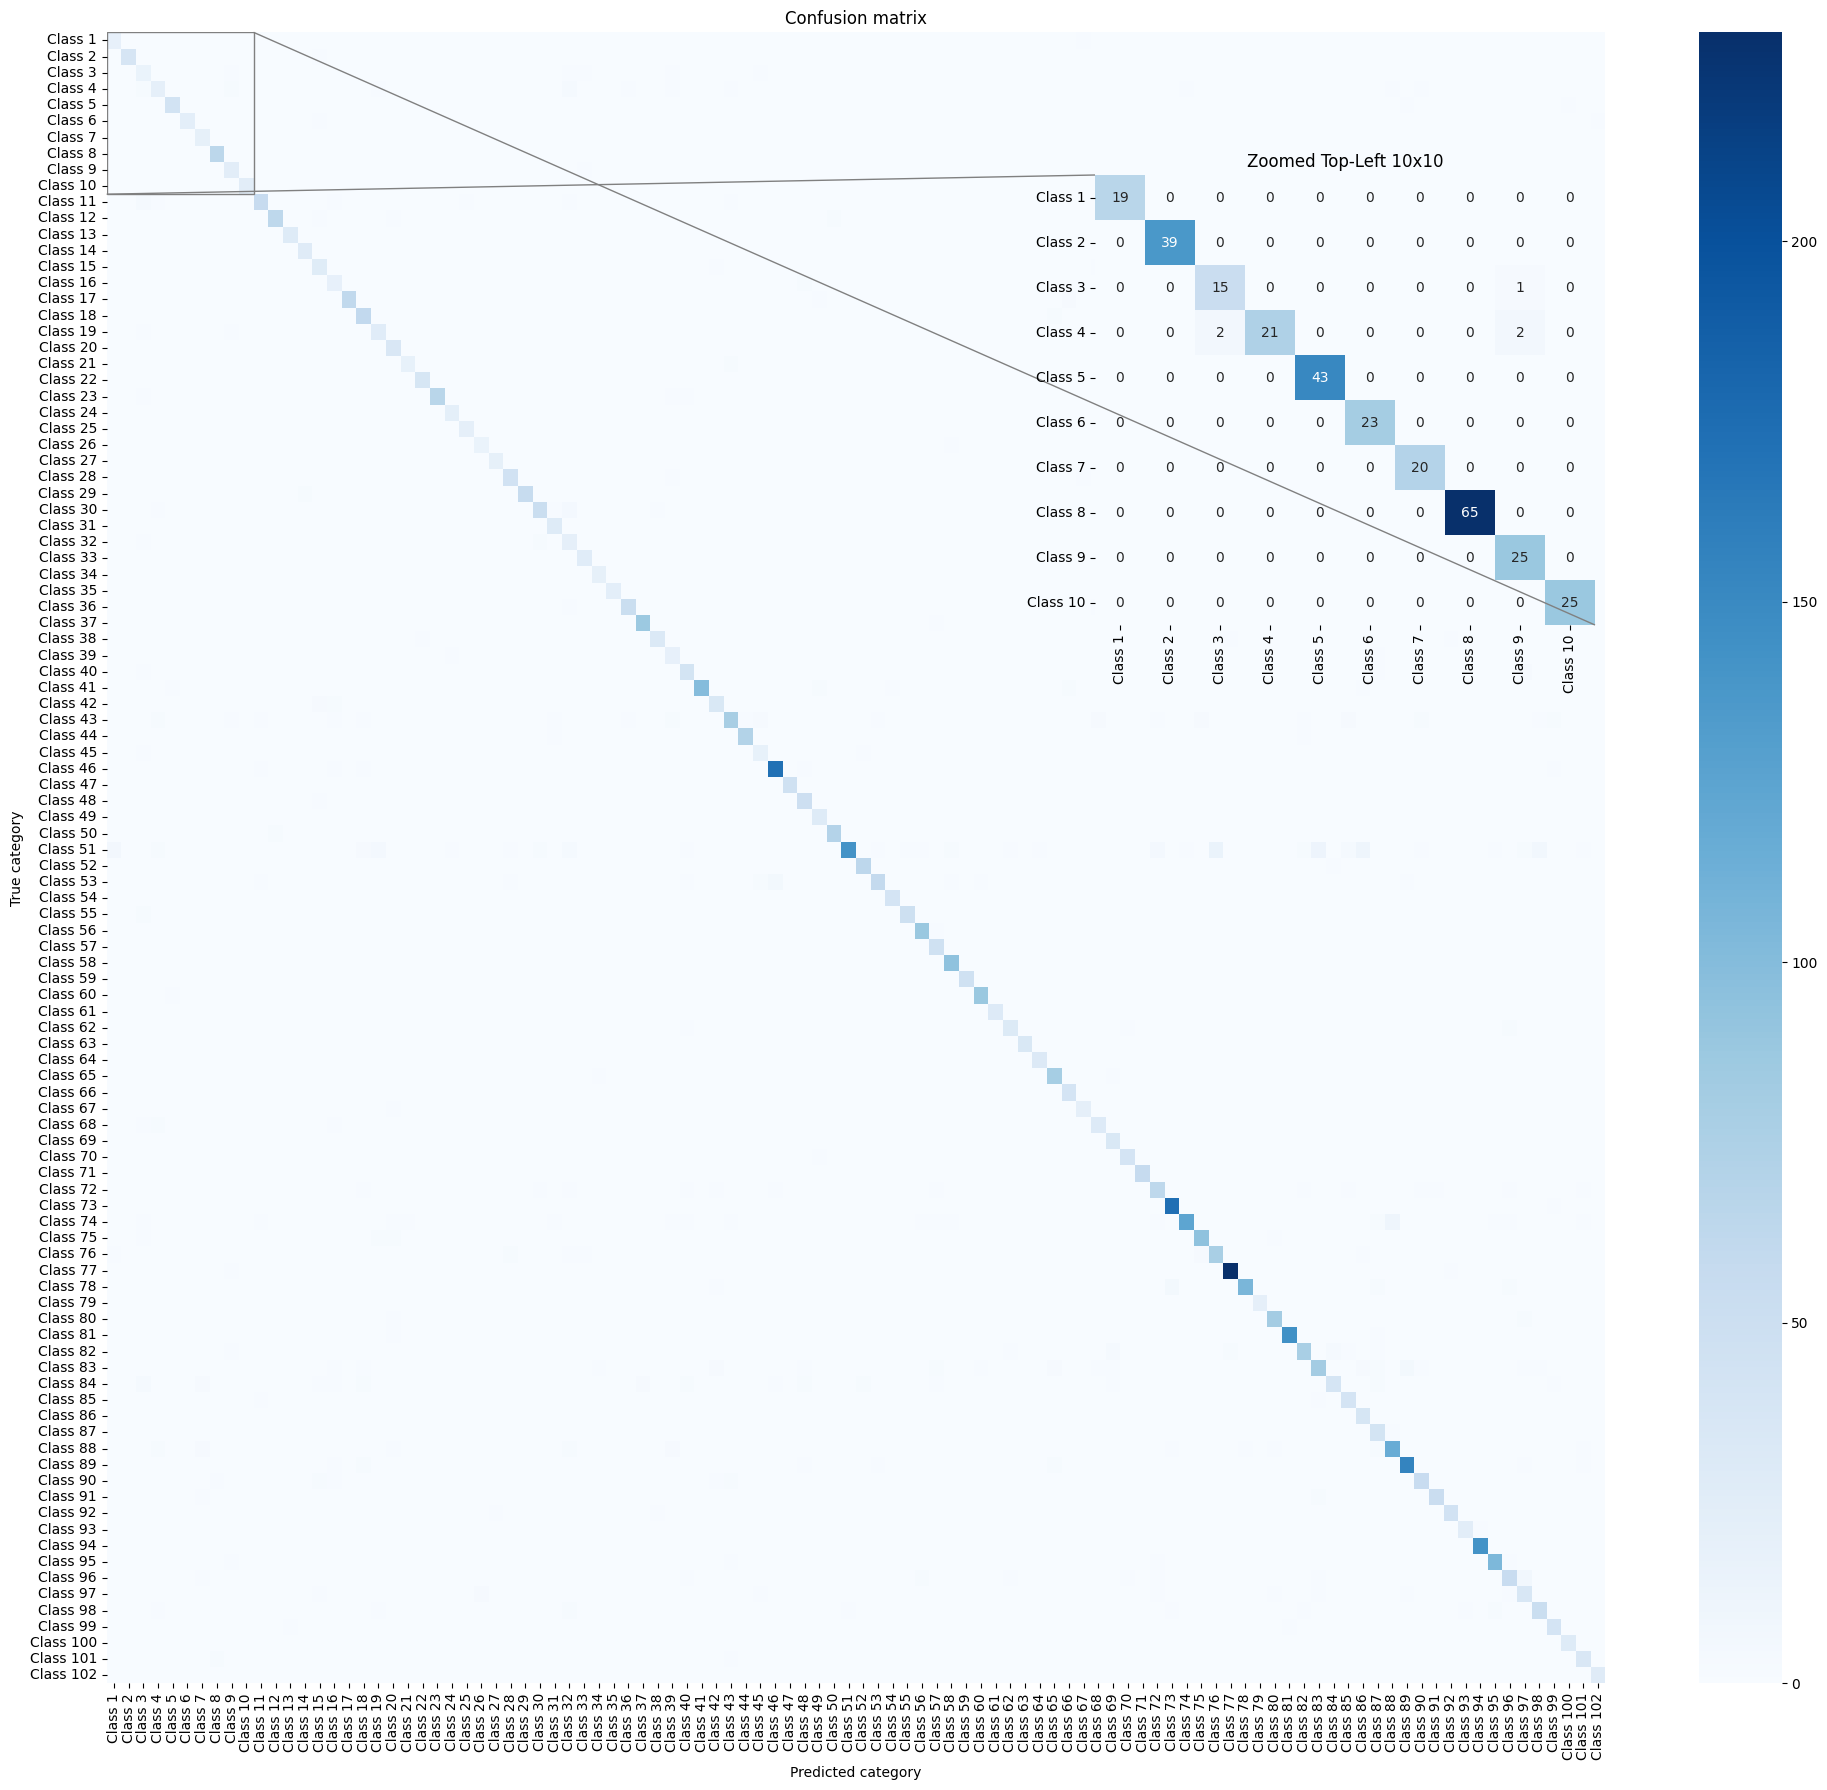

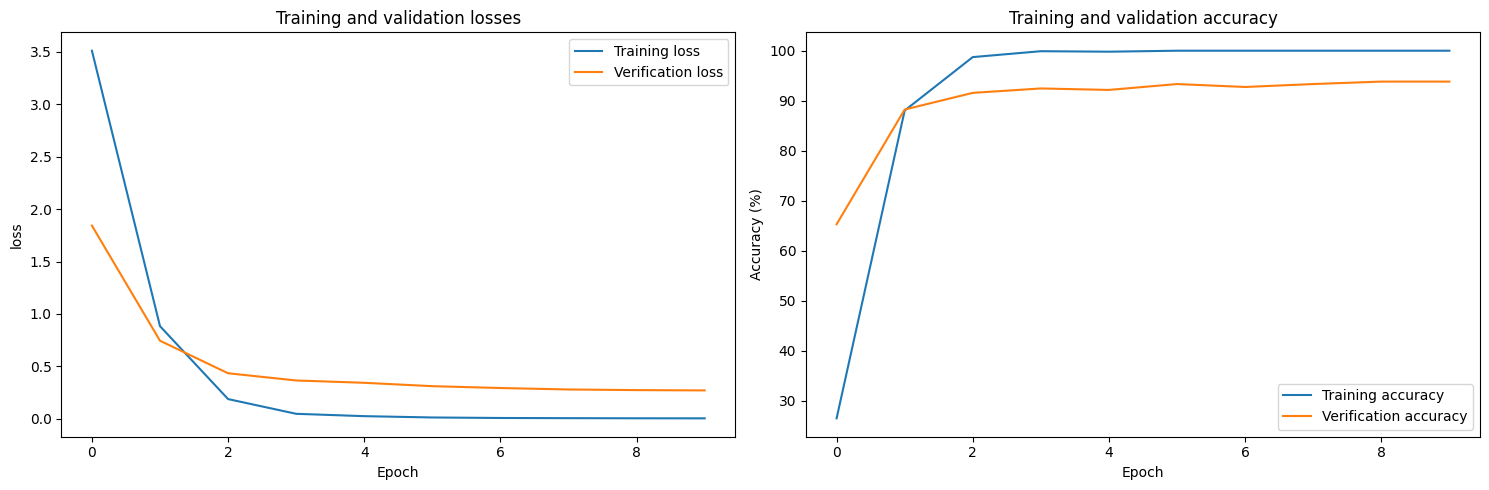

模型训练和评估完成!
混淆矩阵和训练历史已保存为图片文件.


In [2]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import torch
import torch.nn as nn
import torch.optim as optim
from scipy.io import loadmat
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用预训练模型的默认转换
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 获取Oxford Flowers数据集
print("正在下载和准备数据集...")
dataset = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=train_transform
)

# 训练集
train_dataset = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=train_transform
)

# 验证集
val_dataset = datasets.Flowers102(
    root='./data',
    split='val',
    download=True,
    transform=test_transform
)

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")

# 创建测试集
test_dataset = datasets.Flowers102(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 创建数据加载器
batch_size = 64

# 单GPU和多GPU都使用相同的数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 构建预训练ViT模型
def create_vit_model(num_classes=102, unfrozen_layers=2):
    """
    构建ViT模型，并解冻分类头和编码器的最后几层。

    参数:
    - num_classes (int): 数据集的类别数量。
    - unfrozen_layers (int): 要从编码器末尾解冻的Transformer Block数量。
    """
    # 使用推荐的权重API加载预训练的ViT模型
    weights = ViT_B_16_Weights.IMAGENET1K_V1
    model = vit_b_16(weights=weights)
    
    # 首先，冻结所有预训练层的参数
    for param in model.parameters():
        param.requires_grad = False
    
    # ------------------- 主要修改部分开始 -------------------
    
    # ViT-B/16 的编码器有12个Transformer Block，存储在 model.encoder.layers 中
    # 我们将解冻最后的 `unfrozen_layers` 个Block
    if unfrozen_layers > 0:
        total_layers = len(model.encoder.layers)
        for i in range(total_layers - unfrozen_layers, total_layers):
            print(f"解冻编码器层: {i}")
            for param in model.encoder.layers[i].parameters():
                param.requires_grad = True

    # ------------------- 主要修改部分结束 -------------------
    
    # 修改分类头以适应新的任务（37个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 解冻新分类头的参数（默认就是True，但为清晰起见再次设置）
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# --- 在实例化模型时调用修改后的函数 ---
# 我们可以选择解冻最后2层
model = create_vit_model(num_classes=102, unfrozen_layers=2)

# 使用DataParallel在多个GPU上并行运行
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器
# 只优化需要训练的参数（即分类头的参数）
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    [p for p in model.parameters() if p.requires_grad], 
    lr=1e-3
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 训练函数
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 对于DataParallel模型，需要保存model.module
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'best_vit_model_Flowers102.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 训练模型
print("开始训练模型...")
epochs = 10  # 由于Flowers数据集更复杂，增加了训练轮数
history = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 评估模型
def evaluate_model(model, data_loader, device):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 加载最佳模型进行评估
model = create_vit_model()
model.load_state_dict(torch.load('best_vit_model_Flowers102.pth'))
model = model.to(device)

# 如果有多个GPU，在评估时也使用DataParallel
if device_count > 1:
    model = nn.DataParallel(model)

model.eval()

# 在测试集上评估
print("在测试集上评估模型...")
true_labels, predictions = evaluate_model(model, test_loader, device)

# 获取类别名称
# 加载 .mat 文件
labels_file = 'data/flowers-102/imagelabels.mat'
mat_data = loadmat(labels_file)

# 提取标签数据
# 根据 Flowers102 数据集的结构，标签通常存储在 'labels' 或 'imagelabels' 字段中
labels = mat_data['labels'].flatten()  # 或者 mat_data['imagelabels'].flatten()

class_names = np.unique(labels)
class_names = [f"Class {label}" for label in class_names]

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=class_names))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
ax.set_title('Confusion matrix')

# --- 新增代码：创建并绘制放大的子图 ---

# 定义要放大的区域（例如左上角10x10的区域）
zoom_size = 10
x1, x2 = 0, zoom_size
y1, y2 = 0, zoom_size

# 创建一个子坐标轴 (inset_axes)
ax_zoom = fig.add_axes([0.55, 0.65, 0.25, 0.25]) # [left, bottom, width, height]

# 提取要放大的数据
cm_zoom = cm[y1:y2, x1:x2]
class_names_zoom = class_names[y1:y2]

# 在子坐标轴上绘制热力图
sns.heatmap(cm_zoom, annot=True, fmt='d', cmap='Blues', ax=ax_zoom, cbar=False,
            xticklabels=class_names_zoom, yticklabels=class_names_zoom)
ax_zoom.set_title(f'Zoomed Top-Left {zoom_size}x{zoom_size}')
ax_zoom.tick_params(axis='x', labelrotation=90)
ax_zoom.tick_params(axis='y', labelrotation=0)

# 可选：添加标记线指示放大区域
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('confusion_matrix_Flowers102.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_Flowers102.png')
plt.show()
plt.close()

print("模型训练和评估完成!")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在加载Flowers102数据集...
训练集大小: 1020
验证集大小: 1020
测试集大小: 6149
加载预训练的OxfordPets模型...


/tmp/ipykernel_3931309/1460763300.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('best_vit_model_OxfordPets.pth', map_location=device)
/home/ii

使用2个GPU进行训练
开始在Flowers102数据集上微调分类器...


Epoch 1/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s, loss=3.8, acc=38.6] 


Epoch 1/10 - Train Loss: 4.2346, Train Acc: 10.20% - Val Loss: 3.5409, Val Acc: 38.63%
保存最佳模型 (验证准确率: 38.63%)


Epoch 2/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s, loss=2.91, acc=62.5]


Epoch 2/10 - Train Loss: 2.9652, Train Acc: 65.78% - Val Loss: 2.7205, Val Acc: 62.45%
保存最佳模型 (验证准确率: 62.45%)


Epoch 3/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s, loss=2.47, acc=69.6]


Epoch 3/10 - Train Loss: 2.0897, Train Acc: 82.94% - Val Loss: 2.1572, Val Acc: 69.61%
保存最佳模型 (验证准确率: 69.61%)


Epoch 4/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s, loss=2.02, acc=74.3]


Epoch 4/10 - Train Loss: 1.5179, Train Acc: 90.00% - Val Loss: 1.7884, Val Acc: 74.31%
保存最佳模型 (验证准确率: 74.31%)


Epoch 5/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s, loss=1.77, acc=77.4] 


Epoch 5/10 - Train Loss: 1.1443, Train Acc: 90.88% - Val Loss: 1.5429, Val Acc: 77.35%
保存最佳模型 (验证准确率: 77.35%)


Epoch 6/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s, loss=1.61, acc=78.7] 


Epoch 6/10 - Train Loss: 0.8885, Train Acc: 93.92% - Val Loss: 1.3721, Val Acc: 78.73%
保存最佳模型 (验证准确率: 78.73%)


Epoch 7/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s, loss=1.52, acc=79]   


Epoch 7/10 - Train Loss: 0.7152, Train Acc: 95.69% - Val Loss: 1.2575, Val Acc: 79.02%
保存最佳模型 (验证准确率: 79.02%)


Epoch 8/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s, loss=1.47, acc=80.5] 


Epoch 8/10 - Train Loss: 0.5938, Train Acc: 96.47% - Val Loss: 1.1604, Val Acc: 80.49%
保存最佳模型 (验证准确率: 80.49%)


Epoch 9/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.21it/s, loss=1.3, acc=81.1]  


Epoch 9/10 - Train Loss: 0.5012, Train Acc: 97.25% - Val Loss: 1.0875, Val Acc: 81.08%
保存最佳模型 (验证准确率: 81.08%)


Epoch 10/10 [Val]: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s, loss=1.25, acc=81.3] 


Epoch 10/10 - Train Loss: 0.4240, Train Acc: 97.84% - Val Loss: 1.0270, Val Acc: 81.27%
保存最佳模型 (验证准确率: 81.27%)
加载预训练的OxfordPets模型...


/tmp/ipykernel_3931309/1460763300.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('OxfordPets2Flowers102.pth', map_location=devic

在测试集上评估最佳模型...


评估模型: 100%|██████████| 97/97 [00:16<00:00,  5.92it/s]



分类报告:
              precision    recall  f1-score   support

     Class 1       0.67      0.90      0.77        20
     Class 2       0.95      0.95      0.95        40
     Class 3       0.36      0.40      0.38        20
     Class 4       0.52      0.47      0.49        36
     Class 5       0.84      0.82      0.83        45
     Class 6       0.85      0.92      0.88        25
     Class 7       0.47      1.00      0.63        20
     Class 8       0.98      0.98      0.98        65
     Class 9       0.60      0.81      0.69        26
    Class 10       0.96      0.88      0.92        25
    Class 11       0.59      0.70      0.64        67
    Class 12       0.78      0.93      0.84        67
    Class 13       1.00      0.97      0.98        29
    Class 14       0.84      0.96      0.90        28
    Class 15       0.62      0.83      0.71        29
    Class 16       0.43      0.86      0.57        21
    Class 17       0.90      0.88      0.89        65
    Class 18       0

/tmp/ipykernel_3931309/1460763300.py:305: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


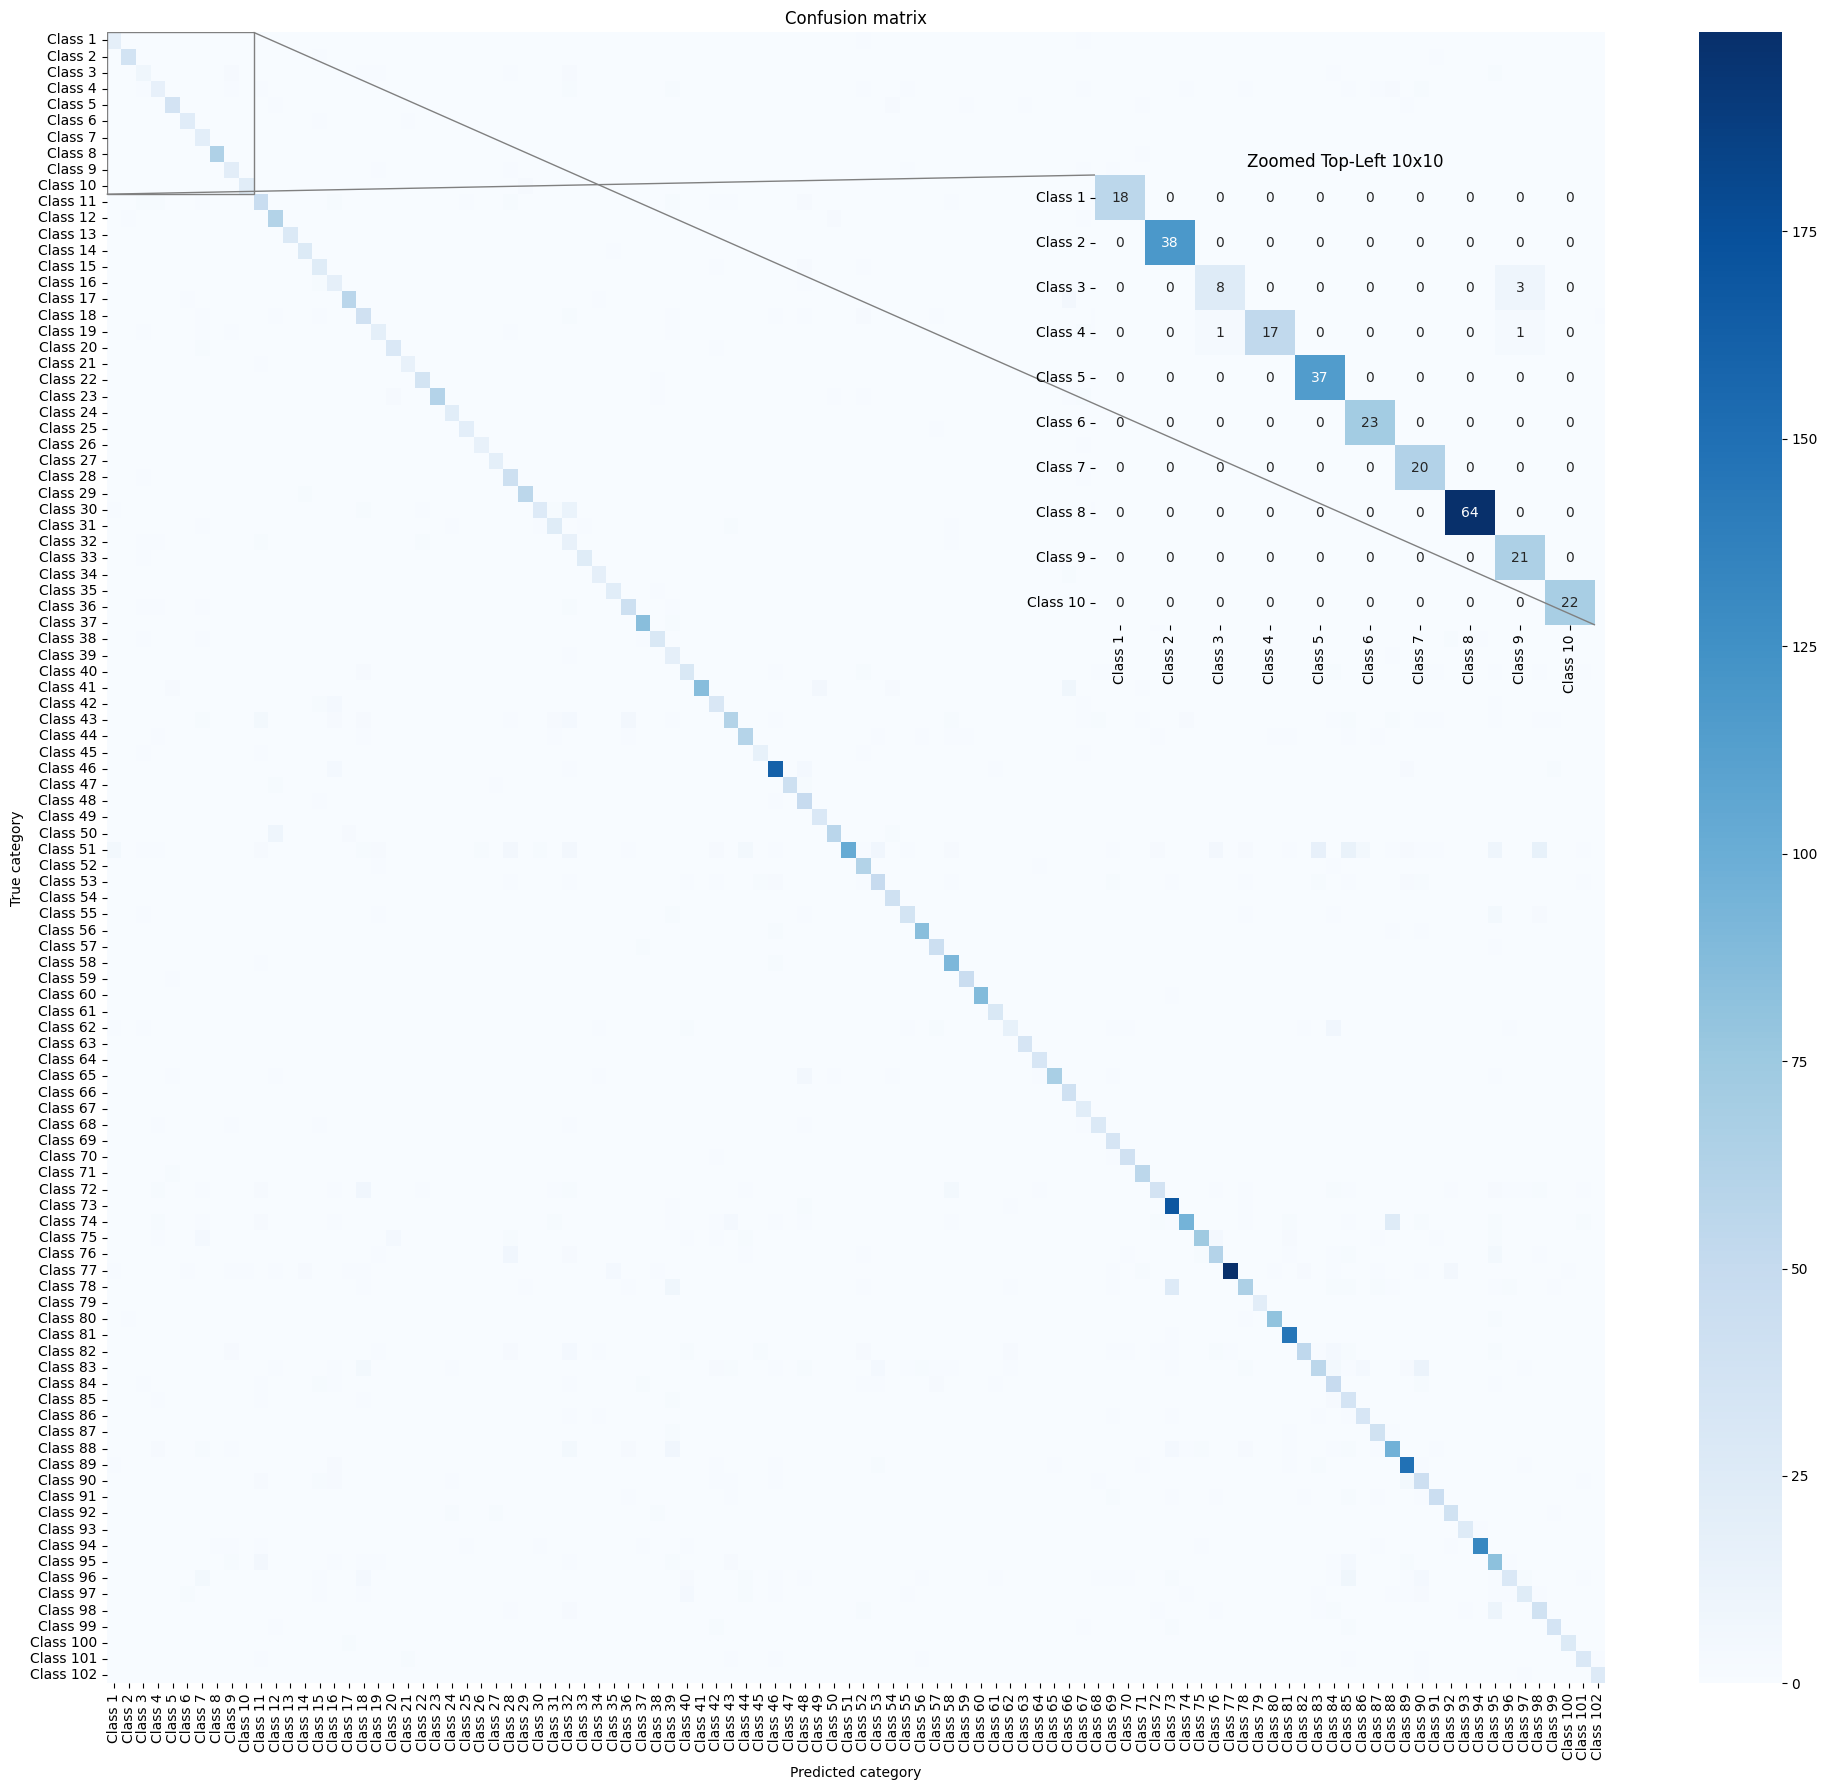

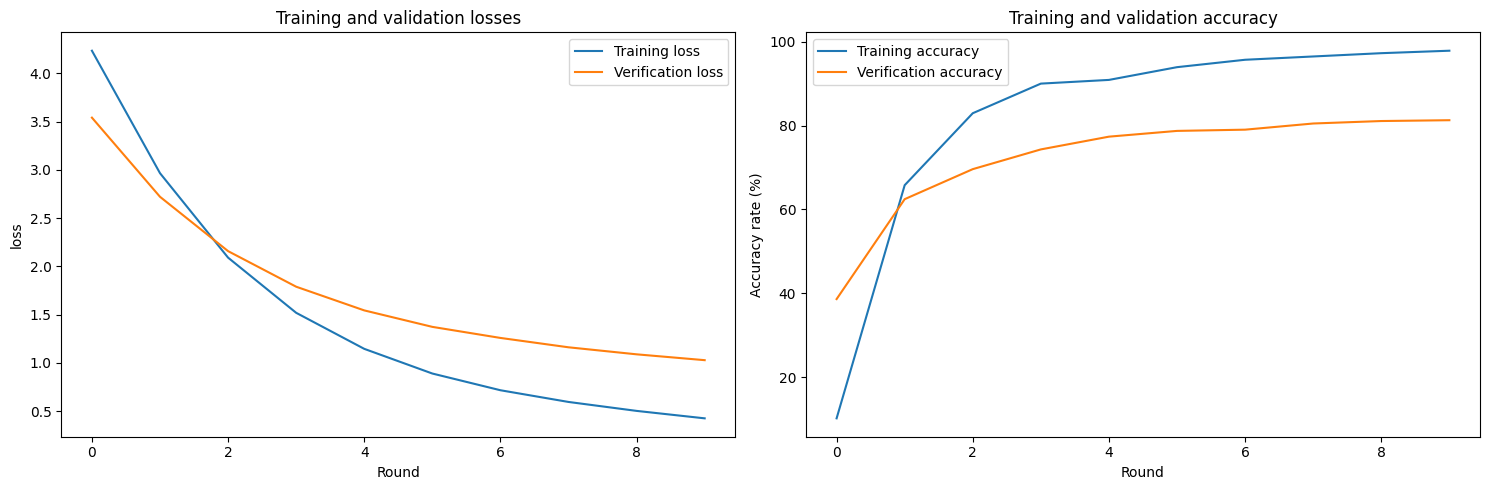

Flowers102模型微调完成!
最佳模型已保存为OxfordPets2Flowers102.pth
混淆矩阵和训练历史已保存为图片文件.


In [3]:
import os
import torch
import torch.nn as nn
from scipy.io import loadmat
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用与预训练模型一致的均值和标准差
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换 - 针对花卉数据的增强
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 加载Flowers102数据集
print("正在加载Flowers102数据集...")

# 训练集
train_dataset = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=train_transform
)

# 验证集
val_dataset = datasets.Flowers102(
    root='./data',
    split='val',
    download=True,
    transform=test_transform
)

# 测试集
test_dataset = datasets.Flowers102(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 输出数据集大小
print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(val_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

# 创建数据加载器
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 加载预训练模型并调整分类器
def create_flowers_model(num_classes=102):
    # 创建基础ViT模型
    model = vit_b_16()

    # 先将分类头调整为与保存的模型一致的输出维度（37类），以便加载权重
    model.heads.head = nn.Linear(model.hidden_dim, 37)
    
    # 加载在OxfordPets上预训练的权重
    print("加载预训练的OxfordPets模型...")
    state_dict = torch.load('best_vit_model_OxfordPets.pth', map_location=device)
    model.load_state_dict(state_dict)
    
    # 冻结所有特征提取层参数
    for param in model.parameters():
        param.requires_grad = False
    
    # 替换分类头以适应Flowers102数据集（102个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 确保分类头参数可训练
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_flowers_model()

# 多GPU支持
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器（只优化分类头参数）
criterion = nn.CrossEntropyLoss()
# 根据是否使用DataParallel调整参数访问方式
if device_count > 1:
    optimizer = optim.Adam(
        model.module.heads.head.parameters(),  # 多GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )
else:
    optimizer = optim.Adam(
        model.heads.head.parameters(),  # 单GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# 训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 根据是否使用DataParallel调整保存方式
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'OxfordPets2Flowers102.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 评估函数
def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 训练模型
print("开始在Flowers102数据集上微调分类器...")
epochs = 10  # 微调分类器通常需要较少的轮次
history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 加载最佳模型进行最终评估
best_model = create_flowers_model()
best_model.load_state_dict(torch.load('OxfordPets2Flowers102.pth', map_location=device))
if device_count > 1:
    best_model = nn.DataParallel(best_model)
best_model = best_model.to(device)
best_model.eval()

# 在测试集上评估
print("在测试集上评估最佳模型...")
true_labels, predictions = evaluate_model(best_model, test_loader, device)

# 获取类别名称
# 加载 .mat 文件
labels_file = 'data/flowers-102/imagelabels.mat'
mat_data = loadmat(labels_file)

# 提取标签数据
# 根据 Flowers102 数据集的结构，标签通常存储在 'labels' 或 'imagelabels' 字段中
labels = mat_data['labels'].flatten()  # 或者 mat_data['imagelabels'].flatten()

class_names = np.unique(labels)
class_names = [f"Class {label}" for label in class_names]

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=class_names))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
ax.set_title('Confusion matrix')

# --- 新增代码：创建并绘制放大的子图 ---

# 定义要放大的区域（例如左上角10x10的区域）
zoom_size = 10
x1, x2 = 0, zoom_size
y1, y2 = 0, zoom_size

# 创建一个子坐标轴 (inset_axes)
ax_zoom = fig.add_axes([0.55, 0.65, 0.25, 0.25]) # [left, bottom, width, height]

# 提取要放大的数据
cm_zoom = cm[y1:y2, x1:x2]
class_names_zoom = class_names[y1:y2]

# 在子坐标轴上绘制热力图
sns.heatmap(cm_zoom, annot=True, fmt='d', cmap='Blues', ax=ax_zoom, cbar=False,
            xticklabels=class_names_zoom, yticklabels=class_names_zoom)
ax_zoom.set_title(f'Zoomed Top-Left {zoom_size}x{zoom_size}')
ax_zoom.tick_params(axis='x', labelrotation=90)
ax_zoom.tick_params(axis='y', labelrotation=0)

# 可选：添加标记线指示放大区域
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('confusion_matrix_OxfordPets2Flowers102.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Round')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy rate (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_OxfordPets2Flowers102.png')
plt.show()
plt.close()

print("Flowers102模型微调完成!")
print("最佳模型已保存为OxfordPets2Flowers102.pth")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在加载OxfordPets数据集...
训练数据集大小: 2944
训练集大小: 2944
验证集大小: 736
测试集大小: 3669
加载预训练的Flowers102模型...


/tmp/ipykernel_3931309/2594733498.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('best_vit_model_Flowers102.pth', map_location=device)
/home/ii

使用2个GPU进行训练
开始在Flowers102数据集上微调分类器...


Epoch 1/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.79it/s, loss=1.03, acc=86.7] 


Epoch 1/10 - Train Loss: 2.1194, Train Acc: 64.40% - Val Loss: 0.9080, Val Acc: 86.68%
保存最佳模型 (验证准确率: 86.68%)


Epoch 2/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.82it/s, loss=0.505, acc=93.2]


Epoch 2/10 - Train Loss: 0.5774, Train Acc: 92.26% - Val Loss: 0.4279, Val Acc: 93.21%
保存最佳模型 (验证准确率: 93.21%)


Epoch 3/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.78it/s, loss=0.41, acc=93.2] 


Epoch 3/10 - Train Loss: 0.3348, Train Acc: 94.57% - Val Loss: 0.3244, Val Acc: 93.21%


Epoch 4/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.77it/s, loss=0.403, acc=93.1]


Epoch 4/10 - Train Loss: 0.2561, Train Acc: 95.18% - Val Loss: 0.2891, Val Acc: 93.07%


Epoch 5/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.83it/s, loss=0.334, acc=94.3]


Epoch 5/10 - Train Loss: 0.2081, Train Acc: 96.37% - Val Loss: 0.2474, Val Acc: 94.29%
保存最佳模型 (验证准确率: 94.29%)


Epoch 6/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.79it/s, loss=0.319, acc=93.3]


Epoch 6/10 - Train Loss: 0.1731, Train Acc: 96.98% - Val Loss: 0.2423, Val Acc: 93.34%


Epoch 7/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.79it/s, loss=0.307, acc=95.1]


Epoch 7/10 - Train Loss: 0.1525, Train Acc: 97.18% - Val Loss: 0.2181, Val Acc: 95.11%
保存最佳模型 (验证准确率: 95.11%)


Epoch 8/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.82it/s, loss=0.297, acc=94.8]


Epoch 8/10 - Train Loss: 0.1359, Train Acc: 97.86% - Val Loss: 0.2148, Val Acc: 94.84%


Epoch 9/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.81it/s, loss=0.276, acc=94.8]


Epoch 9/10 - Train Loss: 0.1174, Train Acc: 98.17% - Val Loss: 0.1918, Val Acc: 94.84%


Epoch 10/10 [Val]: 100%|██████████| 6/6 [00:03<00:00,  1.78it/s, loss=0.306, acc=94.3]


Epoch 10/10 - Train Loss: 0.1041, Train Acc: 98.51% - Val Loss: 0.2065, Val Acc: 94.29%
加载预训练的Flowers102模型...


/tmp/ipykernel_3931309/2594733498.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('Flowers1022OxfordPets.pth', map_location=devic

在测试集上评估最佳模型...


评估模型: 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]



分类报告:
                            precision    recall  f1-score   support

                Abyssinian       0.92      0.89      0.90        98
          American Bulldog       0.79      0.92      0.85       100
 American Pit Bull Terrier       0.80      0.71      0.75       100
              Basset Hound       0.97      0.94      0.95       100
                    Beagle       0.92      0.95      0.94       100
                    Bengal       0.71      0.89      0.79       100
                    Birman       0.76      0.74      0.75       100
                    Bombay       0.85      0.97      0.90        88
                     Boxer       0.93      0.95      0.94        99
         British Shorthair       0.88      0.79      0.83       100
                 Chihuahua       0.96      0.93      0.94       100
              Egyptian Mau       0.89      0.80      0.84        97
    English Cocker Spaniel       1.00      0.97      0.98       100
            English Setter       0.99   

/tmp/ipykernel_3931309/2594733498.py:293: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


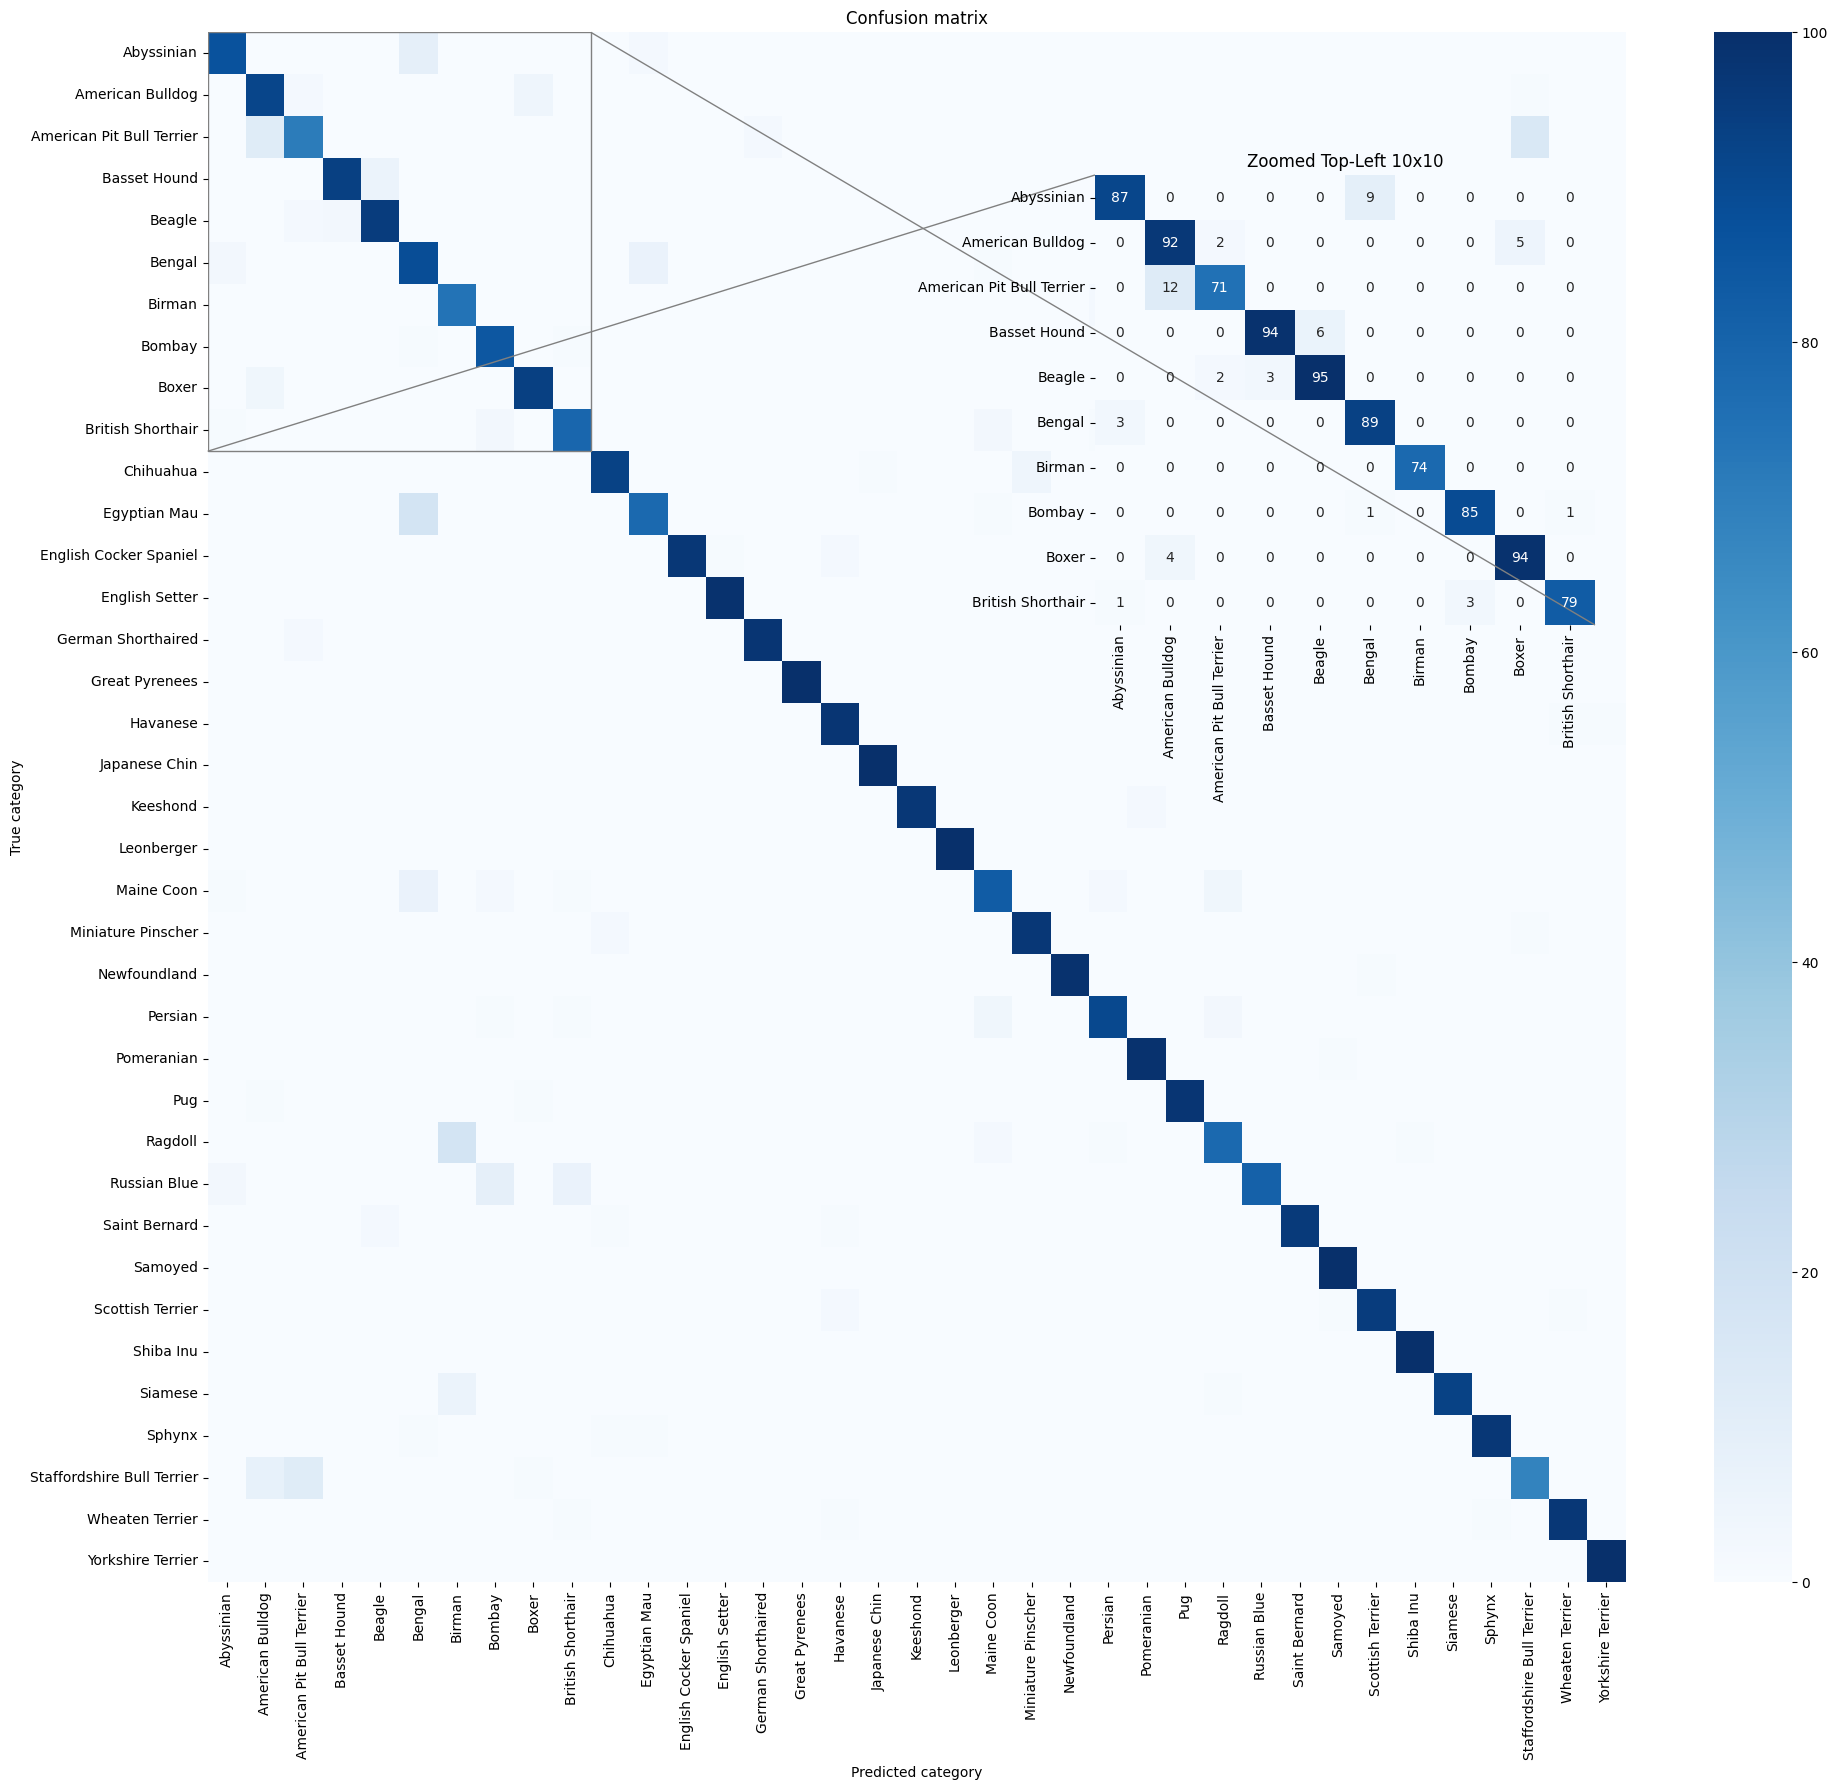

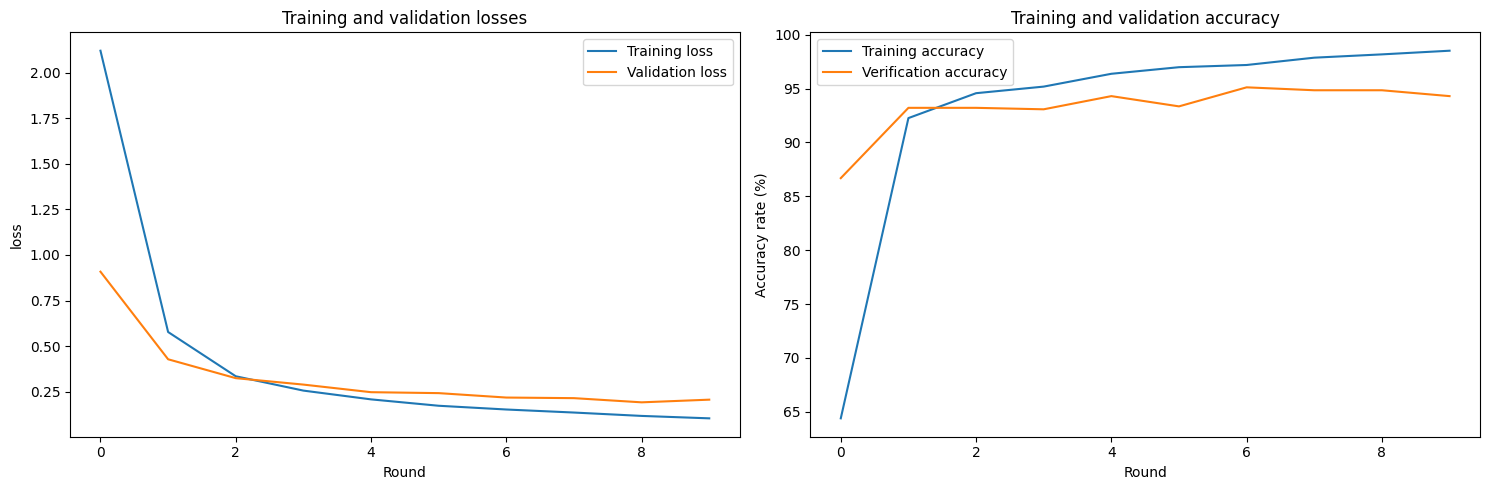

Flowers102模型微调完成!
最佳模型已保存为Flowers1022OxfordPets.pth
混淆矩阵和训练历史已保存为图片文件.


In [4]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用与预训练模型一致的均值和标准差
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换 - 针对花卉数据的增强
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = base_transforms

# 加载OxfordPets数据集
print("正在加载OxfordPets数据集...")

dataset = datasets.OxfordIIITPet(
    root='./data',
    split='trainval',
    download=True,
    transform=train_transform
)

# 划分训练集和验证集
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")

# 创建测试集
test_dataset = datasets.OxfordIIITPet(
    root='./data',
    split='test',
    download=True,
    transform=test_transform
)

# 输出数据集大小
print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(val_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

# 创建数据加载器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 加载预训练模型并调整分类器
def create_flowers_model(num_classes=37):
    # 创建基础ViT模型
    model = vit_b_16()

    # 先将分类头调整为与保存的模型一致的输出维度（37类），以便加载权重
    model.heads.head = nn.Linear(model.hidden_dim, 102)
    
    # 加载在Flowers102上预训练的权重
    print("加载预训练的Flowers102模型...")
    state_dict = torch.load('best_vit_model_Flowers102.pth', map_location=device)
    model.load_state_dict(state_dict)
    
    # 冻结所有特征提取层参数
    for param in model.parameters():
        param.requires_grad = False
    
    # 替换分类头以适应OxfordPets数据集（37个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 确保分类头参数可训练
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_flowers_model()

# 多GPU支持
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器（只优化分类头参数）
criterion = nn.CrossEntropyLoss()
# 根据是否使用DataParallel调整参数访问方式
if device_count > 1:
    optimizer = optim.Adam(
        model.module.heads.head.parameters(),  # 多GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )
else:
    optimizer = optim.Adam(
        model.heads.head.parameters(),  # 单GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# 训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 根据是否使用DataParallel调整保存方式
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'Flowers1022OxfordPets.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 评估函数
def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 训练模型
print("开始在Flowers102数据集上微调分类器...")
epochs = 10  # 微调分类器通常需要较少的轮次
history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 加载最佳模型进行最终评估
best_model = create_flowers_model()
best_model.load_state_dict(torch.load('Flowers1022OxfordPets.pth', map_location=device))
if device_count > 1:
    best_model = nn.DataParallel(best_model)
best_model = best_model.to(device)
best_model.eval()

# 在测试集上评估
print("在测试集上评估最佳模型...")
true_labels, predictions = evaluate_model(best_model, test_loader, device)

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=dataset.classes))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=dataset.classes, yticklabels=dataset.classes)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
ax.set_title('Confusion matrix')

# --- 新增代码：创建并绘制放大的子图 ---

# 定义要放大的区域（例如左上角10x10的区域）
zoom_size = 10
x1, x2 = 0, zoom_size
y1, y2 = 0, zoom_size

# 创建一个子坐标轴 (inset_axes)
ax_zoom = fig.add_axes([0.55, 0.65, 0.25, 0.25]) # [left, bottom, width, height]

# 提取要放大的数据
cm_zoom = cm[y1:y2, x1:x2]
class_names_zoom = dataset.classes[y1:y2]

# 在子坐标轴上绘制热力图
sns.heatmap(cm_zoom, annot=True, fmt='d', cmap='Blues', ax=ax_zoom, cbar=False,
            xticklabels=class_names_zoom, yticklabels=class_names_zoom)
ax_zoom.set_title(f'Zoomed Top-Left {zoom_size}x{zoom_size}')
ax_zoom.tick_params(axis='x', labelrotation=90)
ax_zoom.tick_params(axis='y', labelrotation=0)

# 可选：添加标记线指示放大区域
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('confusion_matrix_Flowers1022OxfordPets.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Round')
plt.ylabel('loss')
plt.title('Training and validation losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy rate (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_Flowers1022OxfordPets.png')
plt.show()
plt.close()

print("Flowers102模型微调完成!")
print("最佳模型已保存为Flowers1022OxfordPets.pth")
print("混淆矩阵和训练历史已保存为图片文件.")

使用设备: cuda
发现2个GPU
正在下载和准备数据集...
Files already downloaded and verified
训练数据集大小: 40000
验证数据集大小: 10000
Files already downloaded and verified
测试数据集大小: 10000
解冻编码器层: 10
解冻编码器层: 11
使用2个GPU进行训练
开始训练模型...


Epoch 1/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s, loss=1.58, acc=78.5]


Epoch 1/10 - Train Loss: 1.7270, Train Acc: 70.72% - Val Loss: 1.4120, Val Acc: 78.52%
保存最佳模型 (验证准确率: 78.52%)


Epoch 2/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s, loss=1.31, acc=80.3]


Epoch 2/10 - Train Loss: 1.2718, Train Acc: 83.27% - Val Loss: 1.3561, Val Acc: 80.28%
保存最佳模型 (验证准确率: 80.28%)


Epoch 3/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s, loss=1.34, acc=80.3]


Epoch 3/10 - Train Loss: 1.1374, Train Acc: 87.67% - Val Loss: 1.3676, Val Acc: 80.29%
保存最佳模型 (验证准确率: 80.29%)


Epoch 4/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s, loss=1.21, acc=80.7]


Epoch 4/10 - Train Loss: 1.0397, Train Acc: 91.18% - Val Loss: 1.3642, Val Acc: 80.68%
保存最佳模型 (验证准确率: 80.68%)


Epoch 5/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s, loss=1.02, acc=81.5]


Epoch 5/10 - Train Loss: 0.9743, Train Acc: 93.58% - Val Loss: 1.3723, Val Acc: 81.47%
保存最佳模型 (验证准确率: 81.47%)


Epoch 6/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s, loss=1.28, acc=81.2]


Epoch 6/10 - Train Loss: 0.9352, Train Acc: 94.95% - Val Loss: 1.3912, Val Acc: 81.18%


Epoch 7/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s, loss=1.2, acc=81.3] 


Epoch 7/10 - Train Loss: 0.9056, Train Acc: 96.00% - Val Loss: 1.3862, Val Acc: 81.26%


Epoch 8/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s, loss=1.2, acc=81.1] 


Epoch 8/10 - Train Loss: 0.8831, Train Acc: 96.82% - Val Loss: 1.4159, Val Acc: 81.11%


Epoch 9/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s, loss=1.46, acc=80.8]


Epoch 9/10 - Train Loss: 0.8730, Train Acc: 97.15% - Val Loss: 1.4282, Val Acc: 80.84%


Epoch 10/10 [Val]: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s, loss=1.36, acc=81.1]


Epoch 10/10 - Train Loss: 0.8662, Train Acc: 97.19% - Val Loss: 1.4149, Val Acc: 81.14%
解冻编码器层: 10
解冻编码器层: 11


/tmp/ipykernel_3931309/67045538.py:251: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vit_model_cifar100.pth'))


在测试集上评估模型...


评估模型: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]



分类报告:
               precision    recall  f1-score   support

        apple       0.92      0.98      0.95       100
aquarium_fish       0.85      0.94      0.90       100
         baby       0.75      0.77      0.76       100
         bear       0.86      0.79      0.82       100
       beaver       0.73      0.71      0.72       100
          bed       0.80      0.86      0.83       100
          bee       0.93      0.92      0.92       100
       beetle       0.88      0.84      0.86       100
      bicycle       0.95      0.94      0.94       100
       bottle       0.89      0.97      0.93       100
         bowl       0.58      0.66      0.62       100
          boy       0.50      0.75      0.60       100
       bridge       0.96      0.92      0.94       100
          bus       0.84      0.87      0.86       100
    butterfly       0.85      0.87      0.86       100
        camel       0.92      0.91      0.91       100
          can       0.83      0.87      0.85       100
  

/tmp/ipykernel_3931309/67045538.py:305: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


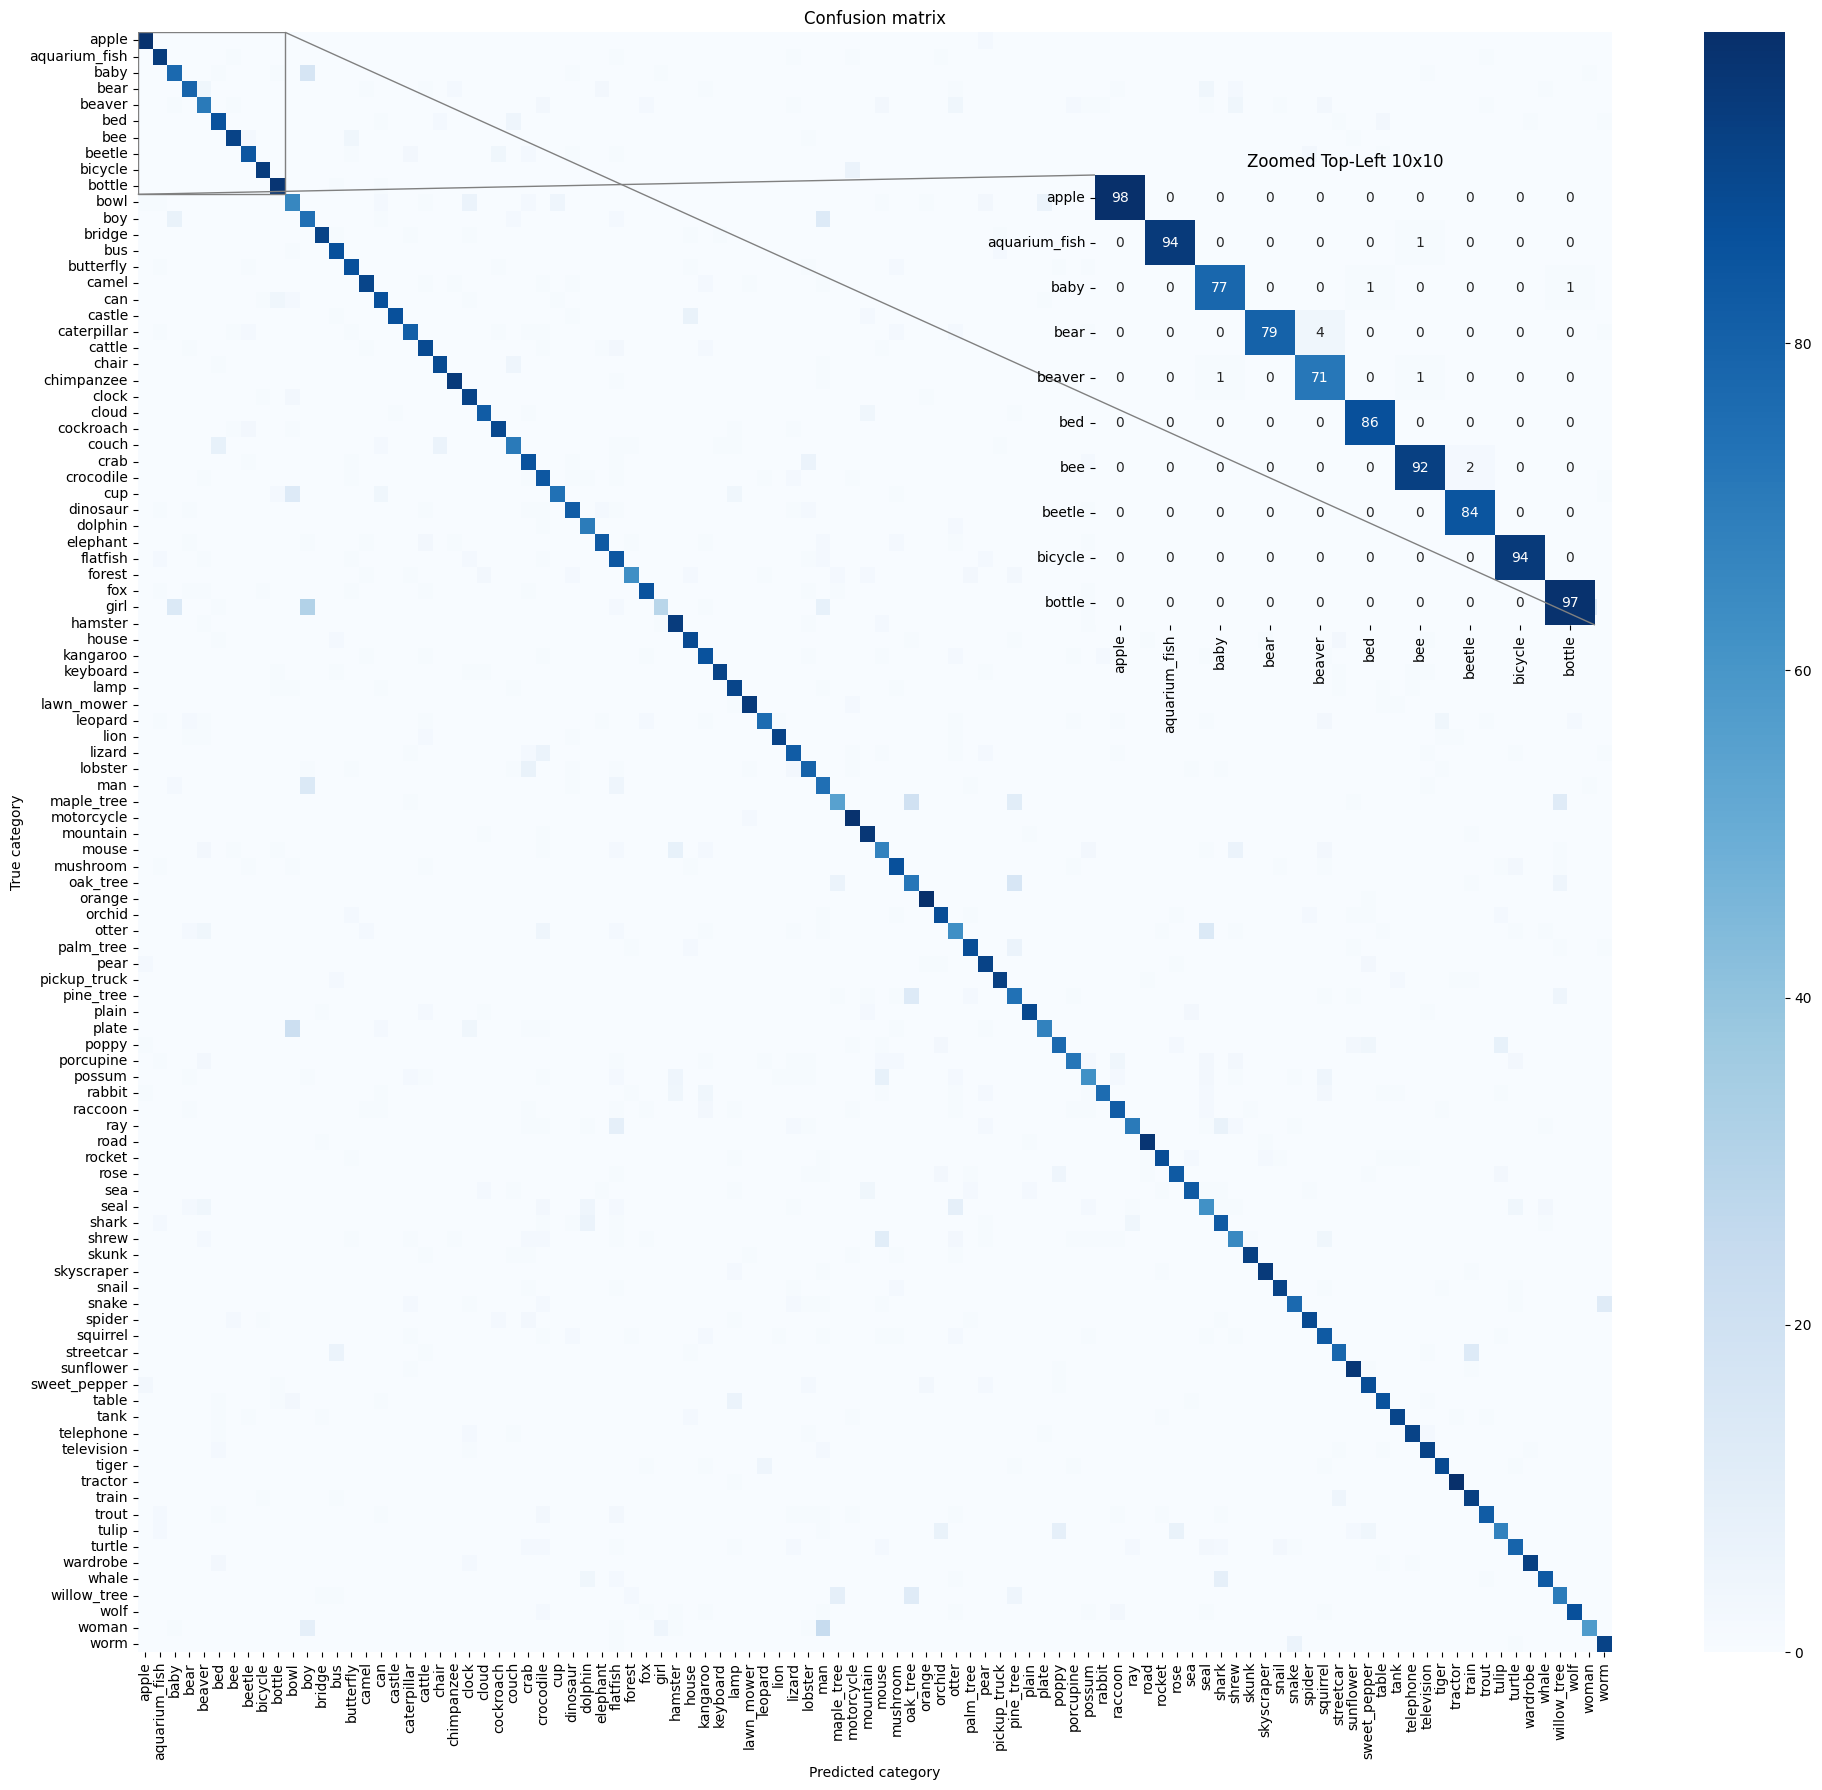

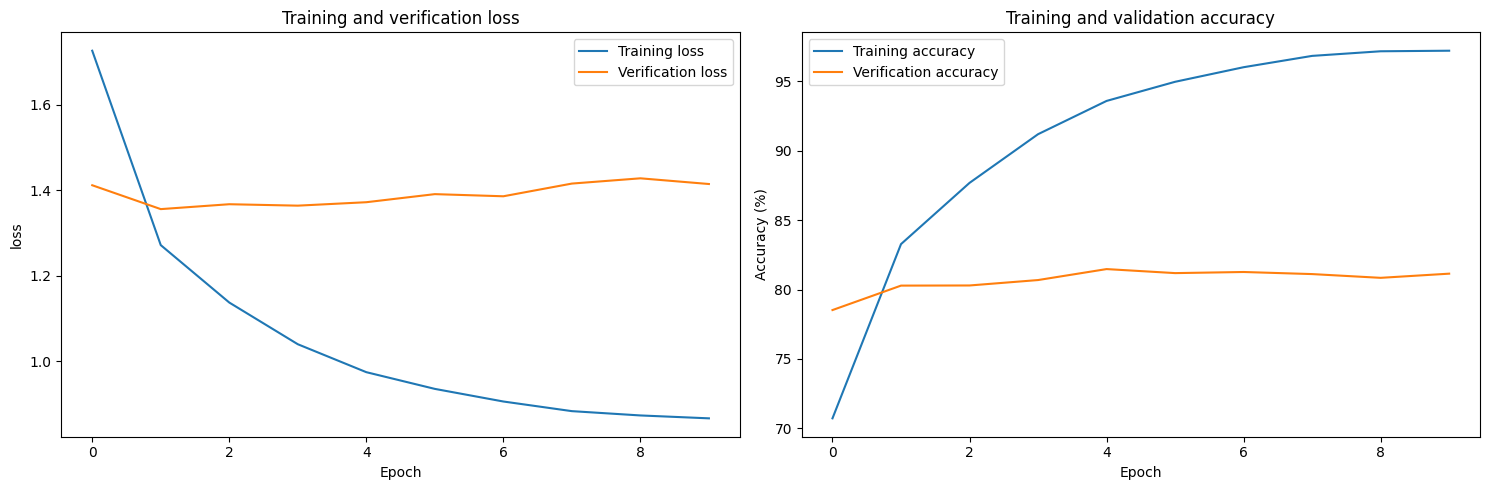

模型训练和评估完成!
混淆矩阵和训练历史已保存为图片文件.


In [6]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用预训练模型的默认转换
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 创建自定义训练转换
train_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.RandomCrop(base_transforms.crop_size, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 创建测试转换
test_transform = transforms.Compose([
    transforms.Resize(base_transforms.resize_size),
    transforms.CenterCrop(base_transforms.crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 获取CIFAR-100数据集
print("正在下载和准备数据集...")
train_dataset = datasets.CIFAR100(
    root='./data',
    train=True,
    download=True,
    transform=train_transform
)

# 划分训练集和验证集
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# 输出训练数据集大小
print(f"训练数据集大小: {len(train_dataset)}")
print(f"验证数据集大小: {len(val_dataset)}")

# 创建测试集
test_dataset = datasets.CIFAR100(
    root='./data',
    train=False,
    download=True,
    transform=test_transform
)

print(f"测试数据集大小: {len(test_dataset)}")

# 创建数据加载器
batch_size = 256  # 由于CIFAR-100图像较小，可以适当增大batch_size

# 单GPU和多GPU都使用相同的数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# 构建预训练ViT模型
def create_vit_model(num_classes=100, unfrozen_layers=2):
    """
    构建ViT模型，并解冻分类头和编码器的最后几层。

    参数:
    - num_classes (int): 数据集的类别数量。
    - unfrozen_layers (int): 要从编码器末尾解冻的Transformer Block数量。
    """
    # 使用推荐的权重API加载预训练的ViT模型
    weights = ViT_B_16_Weights.IMAGENET1K_V1
    model = vit_b_16(weights=weights)
    
    # 首先，冻结所有预训练层的参数
    for param in model.parameters():
        param.requires_grad = False
    
    # ------------------- 主要修改部分开始 -------------------
    
    # ViT-B/16 的编码器有12个Transformer Block，存储在 model.encoder.layers 中
    # 我们将解冻最后的 `unfrozen_layers` 个Block
    if unfrozen_layers > 0:
        total_layers = len(model.encoder.layers)
        for i in range(total_layers - unfrozen_layers, total_layers):
            print(f"解冻编码器层: {i}")
            for param in model.encoder.layers[i].parameters():
                param.requires_grad = True

    # ------------------- 主要修改部分结束 -------------------
    
    # 修改分类头以适应新的任务（37个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 解冻新分类头的参数（默认就是True，但为清晰起见再次设置）
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# --- 在实例化模型时调用修改后的函数 ---
# 我们可以选择解冻最后12层
model = create_vit_model(num_classes=100, unfrozen_layers=2)

# 使用DataParallel在多个GPU上并行运行
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器
# 只优化需要训练的参数
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # 添加标签平滑
optimizer = optim.AdamW(
    [p for p in model.parameters() if p.requires_grad], 
    lr=5e-4,
    weight_decay=1e-2
)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

# 训练函数
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step()
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 对于DataParallel模型，需要保存model.module
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'best_vit_model_cifar100.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 训练模型
print("开始训练模型...")
epochs = 10  # 增加训练轮数
history = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 评估模型
def evaluate_model(model, data_loader, device):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 加载最佳模型进行评估
model = create_vit_model()
model.load_state_dict(torch.load('best_vit_model_cifar100.pth'))
model = model.to(device)

# 如果有多个GPU，在评估时也使用DataParallel
if device_count > 1:
    model = nn.DataParallel(model)

model.eval()

# 在测试集上评估
print("在测试集上评估模型...")
true_labels, predictions = evaluate_model(model, test_loader, device)

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=test_dataset.classes))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
ax.set_title('Confusion matrix')

# --- 新增代码：创建并绘制放大的子图 ---

# 定义要放大的区域（例如左上角10x10的区域）
zoom_size = 10
x1, x2 = 0, zoom_size
y1, y2 = 0, zoom_size

# 创建一个子坐标轴 (inset_axes)
ax_zoom = fig.add_axes([0.55, 0.65, 0.25, 0.25]) # [left, bottom, width, height]

# 提取要放大的数据
cm_zoom = cm[y1:y2, x1:x2]
class_names_zoom = test_dataset.classes[y1:y2]

# 在子坐标轴上绘制热力图
sns.heatmap(cm_zoom, annot=True, fmt='d', cmap='Blues', ax=ax_zoom, cbar=False,
            xticklabels=class_names_zoom, yticklabels=class_names_zoom)
ax_zoom.set_title(f'Zoomed Top-Left {zoom_size}x{zoom_size}')
ax_zoom.tick_params(axis='x', labelrotation=90)
ax_zoom.tick_params(axis='y', labelrotation=0)

# 可选：添加标记线指示放大区域
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('confusion_matrix_cifar100.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and verification loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and validation accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_cifar100.png')
plt.show()
plt.close()

print("模型训练和评估完成!")
print("混淆矩阵和训练历史已保存为图片文件.")    

使用设备: cuda
发现2个GPU
正在加载CIFAR-100数据集...
Files already downloaded and verified
Files already downloaded and verified
训练集大小: 40000
验证集大小: 10000
测试集大小: 10000
加载预训练的OxfordPets模型...


/tmp/ipykernel_3931309/2207307513.py:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('best_vit_model_OxfordPets.pth', map_location=device)
/home/i

使用2个GPU进行训练
开始在CIFAR-100数据集上微调分类器...


Epoch 1/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s, loss=1.44, acc=71.2] 


Epoch 1/10 - Train Loss: 1.8082, Train Acc: 61.58% - Val Loss: 1.1125, Val Acc: 71.24%
保存最佳模型 (验证准确率: 71.24%)


Epoch 2/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s, loss=1.63, acc=73.8] 


Epoch 2/10 - Train Loss: 0.9577, Train Acc: 74.65% - Val Loss: 0.9416, Val Acc: 73.84%
保存最佳模型 (验证准确率: 73.84%)


Epoch 3/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s, loss=1.23, acc=75.1] 


Epoch 3/10 - Train Loss: 0.8192, Train Acc: 77.59% - Val Loss: 0.8830, Val Acc: 75.12%
保存最佳模型 (验证准确率: 75.12%)


Epoch 4/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s, loss=0.812, acc=76.4]


Epoch 4/10 - Train Loss: 0.7422, Train Acc: 79.48% - Val Loss: 0.8279, Val Acc: 76.39%
保存最佳模型 (验证准确率: 76.39%)


Epoch 5/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s, loss=1.21, acc=76.6] 


Epoch 5/10 - Train Loss: 0.6887, Train Acc: 80.23% - Val Loss: 0.8180, Val Acc: 76.62%
保存最佳模型 (验证准确率: 76.62%)


Epoch 6/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s, loss=1.39, acc=76.7] 


Epoch 6/10 - Train Loss: 0.6421, Train Acc: 81.79% - Val Loss: 0.7965, Val Acc: 76.69%
保存最佳模型 (验证准确率: 76.69%)


Epoch 7/10 [Val]: 100%|██████████| 40/40 [00:23<00:00,  1.73it/s, loss=1.06, acc=76.9] 


Epoch 7/10 - Train Loss: 0.6156, Train Acc: 82.28% - Val Loss: 0.7947, Val Acc: 76.89%
保存最佳模型 (验证准确率: 76.89%)


Epoch 8/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s, loss=0.914, acc=77.2]


Epoch 8/10 - Train Loss: 0.5880, Train Acc: 82.84% - Val Loss: 0.7814, Val Acc: 77.18%
保存最佳模型 (验证准确率: 77.18%)


Epoch 9/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s, loss=1.27, acc=77.3] 


Epoch 9/10 - Train Loss: 0.5652, Train Acc: 83.62% - Val Loss: 0.7869, Val Acc: 77.27%
保存最佳模型 (验证准确率: 77.27%)


Epoch 10/10 [Val]: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s, loss=1.04, acc=77.5] 


Epoch 10/10 - Train Loss: 0.5472, Train Acc: 84.17% - Val Loss: 0.7716, Val Acc: 77.48%
保存最佳模型 (验证准确率: 77.48%)
加载预训练的OxfordPets模型...


/tmp/ipykernel_3931309/2207307513.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('OxfordPets2CIFAR100.pth', map_location=device)

在测试集上评估最佳模型...


评估模型: 100%|██████████| 40/40 [00:22<00:00,  1.80it/s]



分类报告:
               precision    recall  f1-score   support

        apple       0.88      0.98      0.93       100
aquarium_fish       0.85      0.93      0.89       100
         baby       0.78      0.65      0.71       100
         bear       0.79      0.81      0.80       100
       beaver       0.73      0.66      0.69       100
          bed       0.76      0.81      0.78       100
          bee       0.93      0.89      0.91       100
       beetle       0.89      0.81      0.85       100
      bicycle       0.85      0.93      0.89       100
       bottle       0.93      0.96      0.95       100
         bowl       0.69      0.62      0.65       100
          boy       0.47      0.55      0.51       100
       bridge       0.77      0.85      0.81       100
          bus       0.79      0.90      0.84       100
    butterfly       0.89      0.78      0.83       100
        camel       0.88      0.94      0.91       100
          can       0.83      0.90      0.86       100
  

/tmp/ipykernel_3931309/2207307513.py:313: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


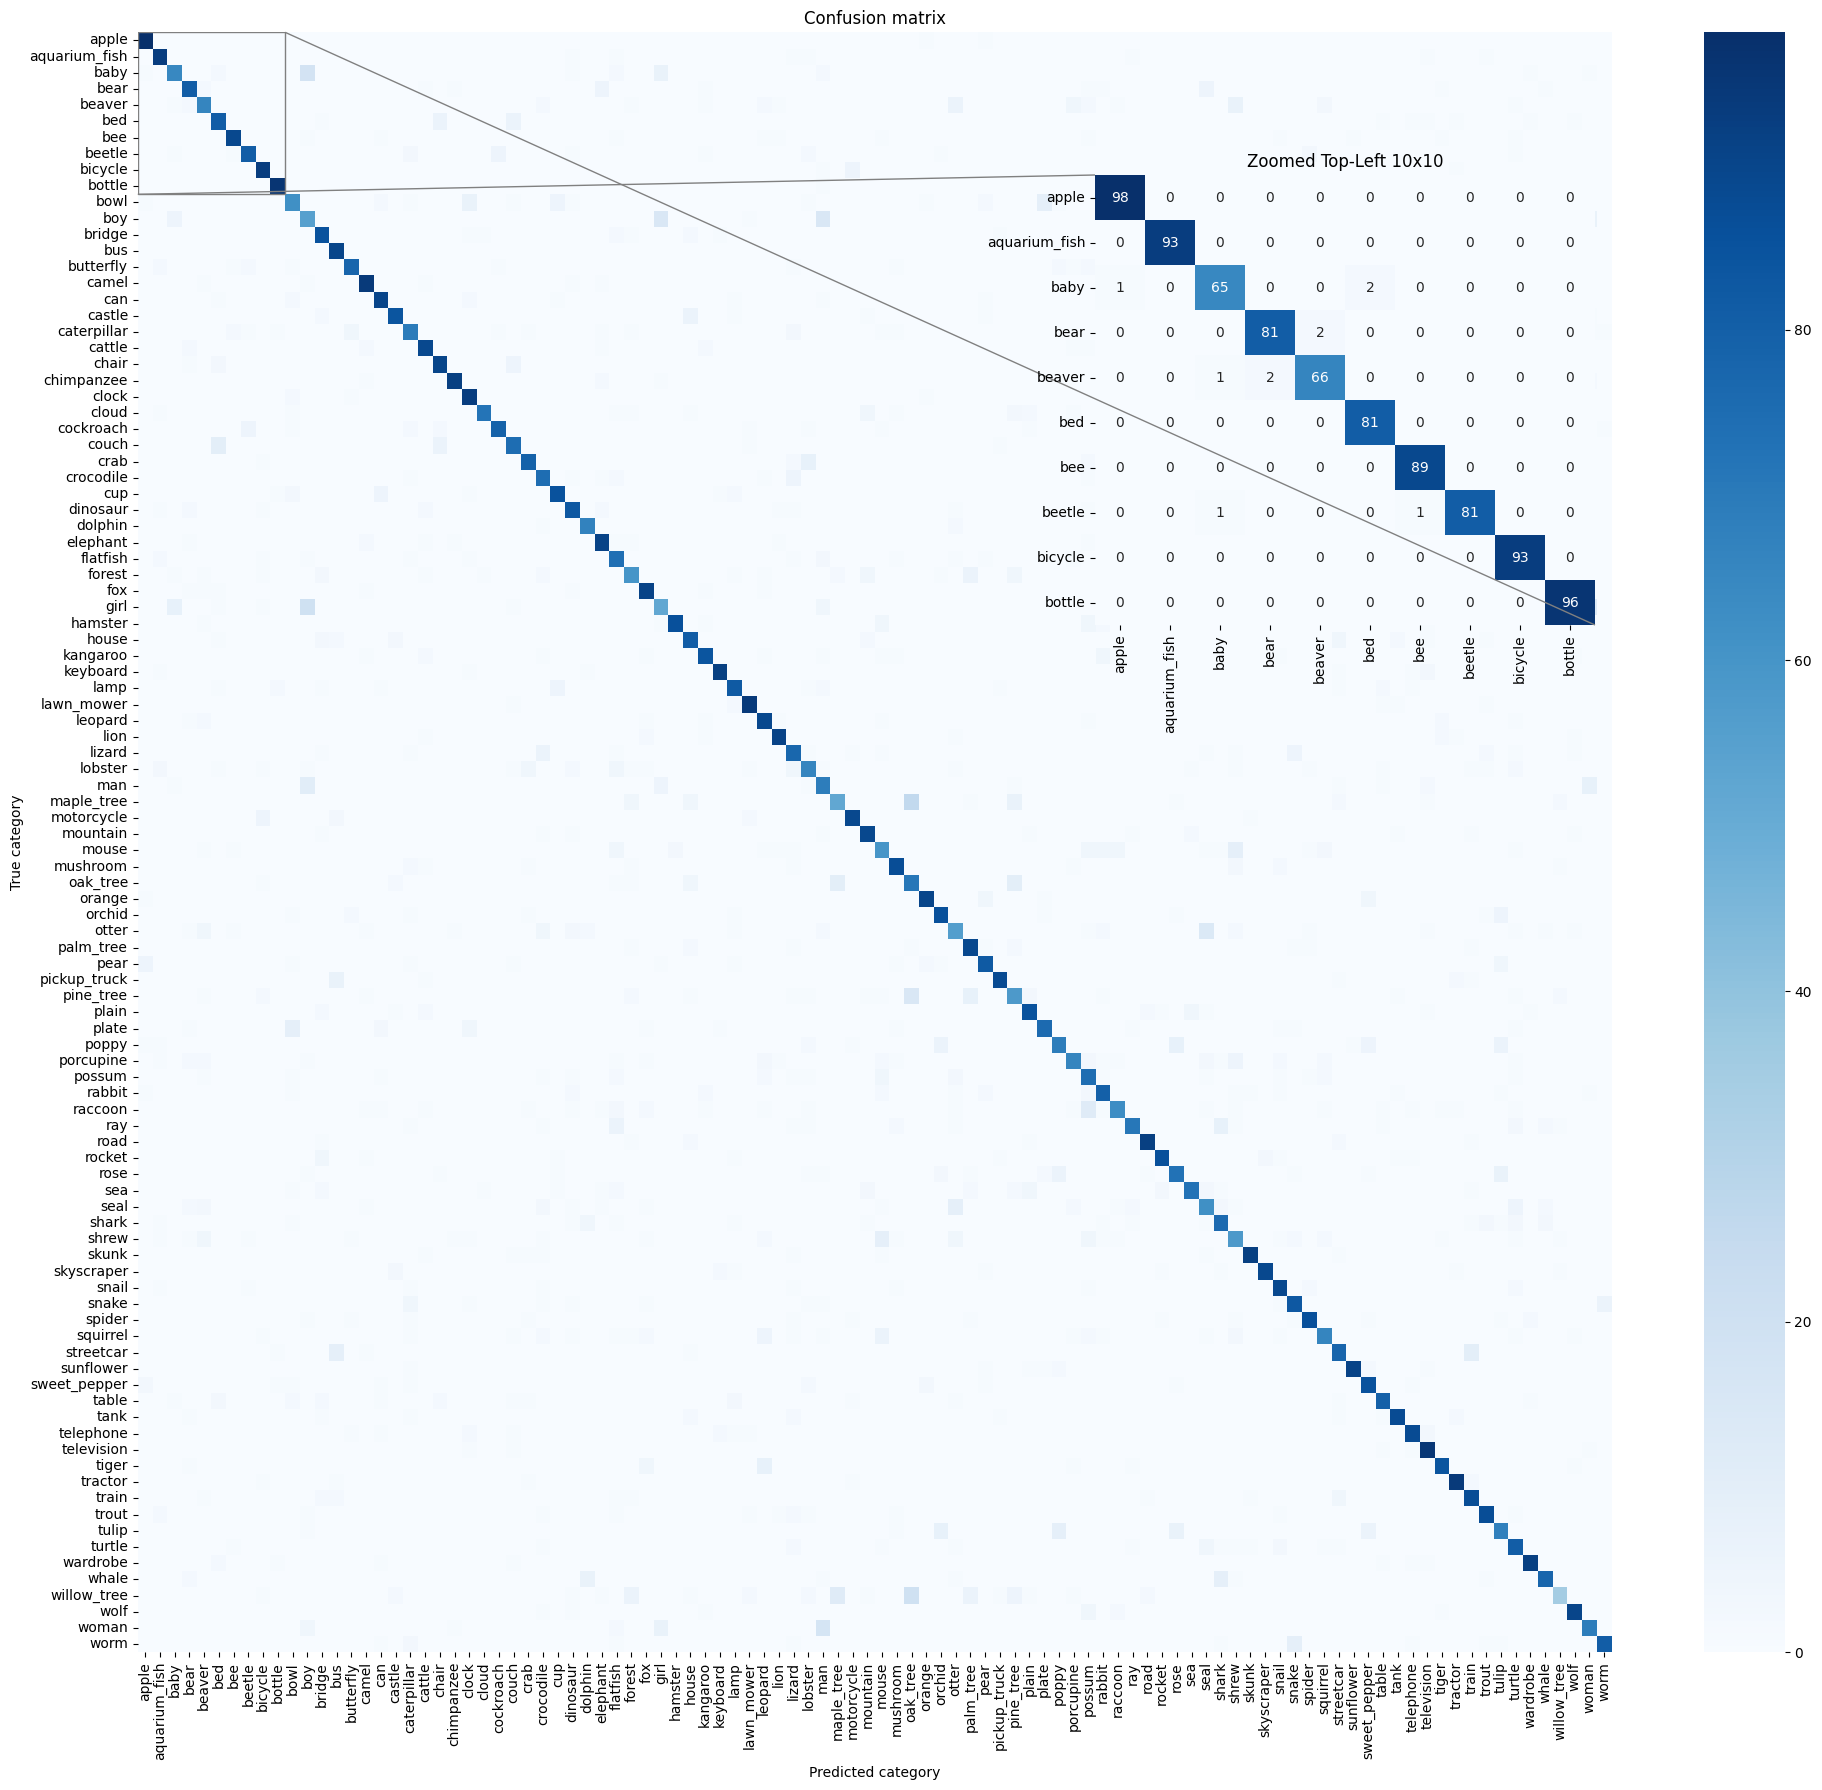

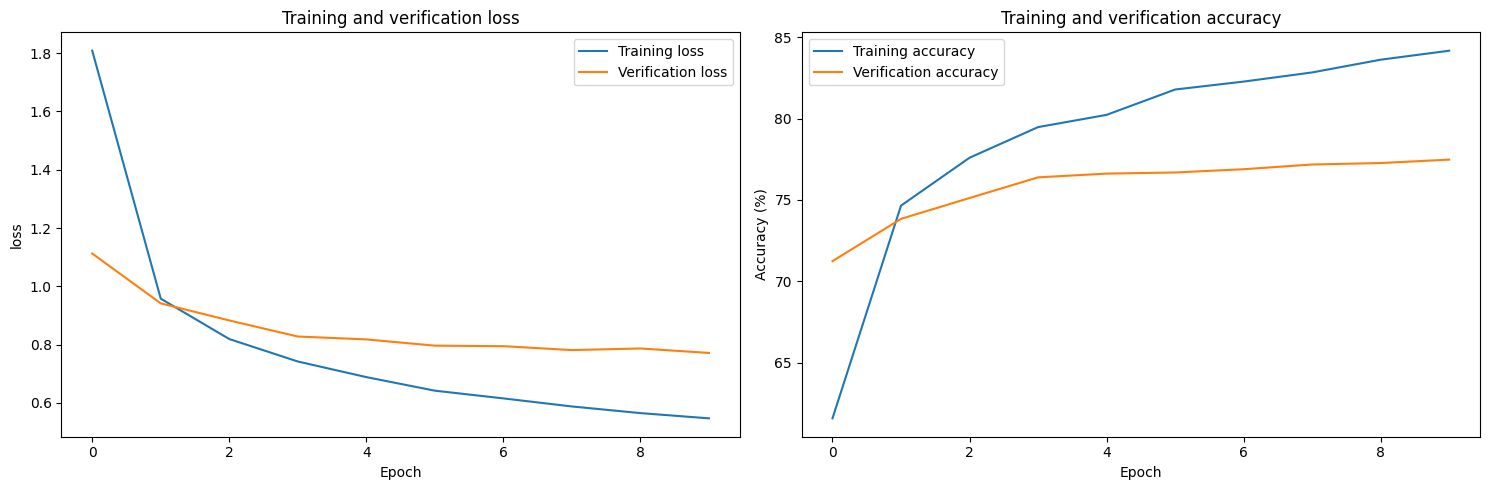

CIFAR-100模型微调完成!
最佳模型已保存为OxfordPets2CIFAR100.pth
混淆矩阵和训练历史已保存为图片文件.


In [7]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models import vit_b_16, ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 检测GPU数量
device_count = torch.cuda.device_count()
print(f"发现{device_count}个GPU")

# 数据预处理和增强
# 使用与预训练模型一致的均值和标准差
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_transforms = weights.transforms()

# 针对CIFAR-100的特点调整预处理
# CIFAR-100图像尺寸较小(32x32)，需要调整预处理参数
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 将图像调整为ViT输入尺寸
    transforms.RandomCrop(224, padding=24),  # 随机裁剪
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 将图像调整为ViT输入尺寸
    transforms.ToTensor(),
    transforms.Normalize(mean=base_transforms.mean, std=base_transforms.std)
])

# 加载CIFAR-100数据集
print("正在加载CIFAR-100数据集...")

# 训练集
train_dataset = datasets.CIFAR100(
    root='./data',
    train=True,
    download=True,
    transform=train_transform
)

# 测试集（CIFAR-100没有专门的验证集，使用测试集进行评估）
test_dataset = datasets.CIFAR100(
    root='./data',
    train=False,
    download=True,
    transform=test_transform
)

# 创建验证集（从训练集中划分）
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# 输出数据集大小
print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(val_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

# 获取CIFAR-100的类别名称
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

# 创建数据加载器
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 加载预训练模型并调整分类器
def create_cifar_model(num_classes=100):
    # 创建基础ViT模型
    model = vit_b_16()

    # 先将分类头调整为与保存的模型一致的输出维度（37类），以便加载权重
    model.heads.head = nn.Linear(model.hidden_dim, 37)
    
    # 加载在OxfordPets上预训练的权重
    print("加载预训练的OxfordPets模型...")
    state_dict = torch.load('best_vit_model_OxfordPets.pth', map_location=device)
    model.load_state_dict(state_dict)
    
    # 冻结所有特征提取层参数
    for param in model.parameters():
        param.requires_grad = False
    
    # 替换分类头以适应CIFAR-100数据集（100个类别）
    model.heads.head = nn.Linear(model.hidden_dim, num_classes)
    
    # 确保分类头参数可训练
    for param in model.heads.head.parameters():
        param.requires_grad = True
    
    return model

# 实例化模型
model = create_cifar_model()

# 多GPU支持
if device_count > 1:
    print(f"使用{device_count}个GPU进行训练")
    model = nn.DataParallel(model)

model = model.to(device)

# 定义损失函数和优化器（只优化分类头参数）
criterion = nn.CrossEntropyLoss()
# 根据是否使用DataParallel调整参数访问方式
if device_count > 1:
    optimizer = optim.Adam(
        model.module.heads.head.parameters(),  # 多GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )
else:
    optimizer = optim.Adam(
        model.heads.head.parameters(),  # 单GPU情况
        lr=1e-3,
        weight_decay=1e-5
    )

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# 训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_progress.set_postfix({'loss': loss.item(), 'acc': 100.*correct/total})
        
        train_loss = running_loss / len(train_dataset)
        train_acc = 100. * correct / total
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_progress = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_progress.set_postfix({'loss': loss.item(), 'acc': 100.*val_correct/val_total})
        
        val_loss = val_loss / len(val_dataset)
        val_acc = 100. * val_correct / val_total
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 记录历史数据
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # 根据是否使用DataParallel调整保存方式
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), 'OxfordPets2CIFAR100.pth')
            print(f'保存最佳模型 (验证准确率: {best_val_acc:.2f}%)')
    
    return history

# 评估函数
def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc='评估模型'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    return all_labels, all_predictions

# 训练模型
print("开始在CIFAR-100数据集上微调分类器...")
epochs = 10  # 微调分类器通常需要较少的轮次
history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

# 加载最佳模型进行最终评估
best_model = create_cifar_model()
best_model.load_state_dict(torch.load('OxfordPets2CIFAR100.pth', map_location=device))
if device_count > 1:
    best_model = nn.DataParallel(best_model)
best_model = best_model.to(device)
best_model.eval()

# 在测试集上评估
print("在测试集上评估最佳模型...")
true_labels, predictions = evaluate_model(best_model, test_loader, device)

# 生成分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=cifar100_classes))

# 计算准确率
accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f"\n测试集准确率: {accuracy * 100:.2f}%")


# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(20, 18))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=cifar100_classes, yticklabels=cifar100_classes)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
ax.set_title('Confusion matrix')

# --- 新增代码：创建并绘制放大的子图 ---

# 定义要放大的区域（例如左上角10x10的区域）
zoom_size = 10
x1, x2 = 0, zoom_size
y1, y2 = 0, zoom_size

# 创建一个子坐标轴 (inset_axes)
ax_zoom = fig.add_axes([0.55, 0.65, 0.25, 0.25]) # [left, bottom, width, height]

# 提取要放大的数据
cm_zoom = cm[y1:y2, x1:x2]
class_names_zoom = cifar100_classes[y1:y2]

# 在子坐标轴上绘制热力图
sns.heatmap(cm_zoom, annot=True, fmt='d', cmap='Blues', ax=ax_zoom, cbar=False,
            xticklabels=class_names_zoom, yticklabels=class_names_zoom)
ax_zoom.set_title(f'Zoomed Top-Left {zoom_size}x{zoom_size}')
ax_zoom.tick_params(axis='x', labelrotation=90)
ax_zoom.tick_params(axis='y', labelrotation=0)

# 可选：添加标记线指示放大区域
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('confusion_matrix_OxfordPets2CIFAR100.png')
plt.show()

# 绘制训练历史
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training loss')
plt.plot(history['val_loss'], label='Verification loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and verification loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training accuracy')
plt.plot(history['val_acc'], label='Verification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and verification accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_OxfordPets2CIFAR100.png')
plt.show()
plt.close()

print("CIFAR-100模型微调完成!")
print("最佳模型已保存为OxfordPets2CIFAR100.pth")
print("混淆矩阵和训练历史已保存为图片文件.")    